In [10]:
import utils as ut
df = pd.read_csv("../../insurance_fraud_detect_data.csv")
print(df.shape)

# 41개 삭제
ls = [43, 1504, 1762, 11706, 12031, 12665, 480, 4515, 4651, 8596, 9904, 10635, 11104, 11120, 11994, 12956,
      12972, 14533, 14792, 15242, 209, 268, 12132, 8477, 12705, 8514, 532, 4158, 5401, 13077, 4595, 6839,
      11710, 12377, 15080, 1115, 5398, 5790, 9523, 9528, 12050]
print(len(ls))
socar = df.drop(ls)
print(socar.shape)
socar.head(3)

(16000, 25)
41
(15959, 25)


fraud_YN  car_model  sharing_type  age_group  has_previous_accident  \
0         0          2             1          3                      0   
1         0          1             0          4                      0   
2         0          1             0          4                      1   

   cumulative_use_count  b2b  accident_ratio  pf_type  socarpass  ...  \
0                     2    0             100        2          0  ...   
1                     4    0               0        3          1  ...   
2                     4    0             100        3          1  ...   

   insure_cost  accident_location  car_part1  car_part2  repair_cnt  \
0            0                  1          0          0           1   
1            0                  1          1          1           2   
2     12925040                  3          1          0           2   

   acc_type1  insurance_site_aid_YN  police_site_aid_YN  total_prsn_cnt  \
0          0                      0                   0              -1   
1          1                      1                   1               0   
2          1                      1                   1               0   

   test_set  
0         0  
1         1  
2         1  

[3 rows x 25 columns]

# ---------------- BorderlineSMOTE ----------------

### (1) null_del = Y , encoded = Y , scaler = None

In [11]:
# null_del
socar_delete = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# 1hot
cat_attribs = socar_delete.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cnt', 'test_set',
                                         'sharing_type', 'has_previous_accident', 'socarpass', 'socarsave', 'car_part1', 'car_part2'])
socar_df = pd.get_dummies(socar_delete, columns=cat_attribs)
# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')

==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]


In [12]:
len(socar_df.columns)

53

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   1.7s
====Done Evaluation====
====Done Evaluation====


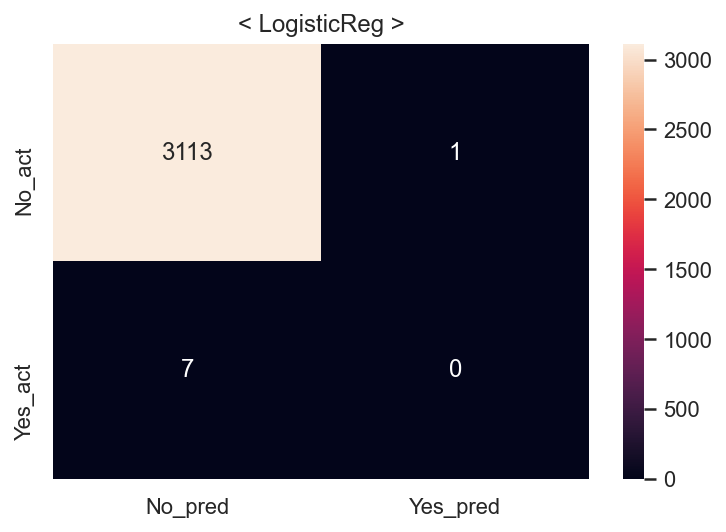

Fitting 5 folds for each of 4 candidates, totalling 20 fits
====Done Evaluation====
====Done Evaluation====


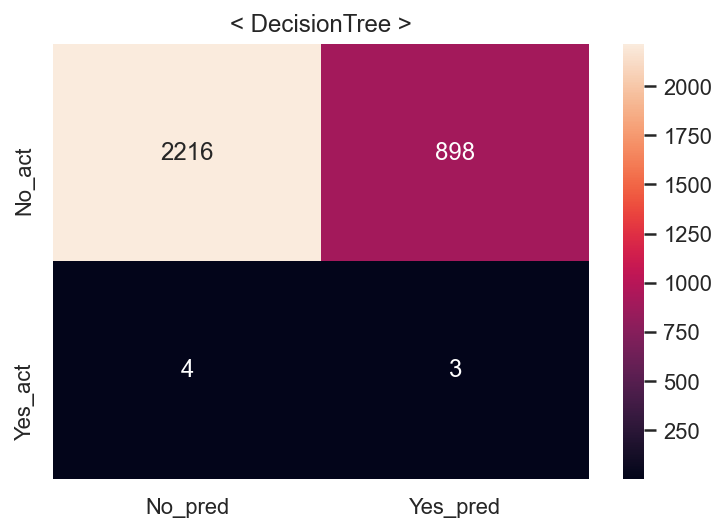

Fitting 5 folds for each of 28 candidates, totalling 140 fits
====Done Evaluation====
====Done Evaluation====


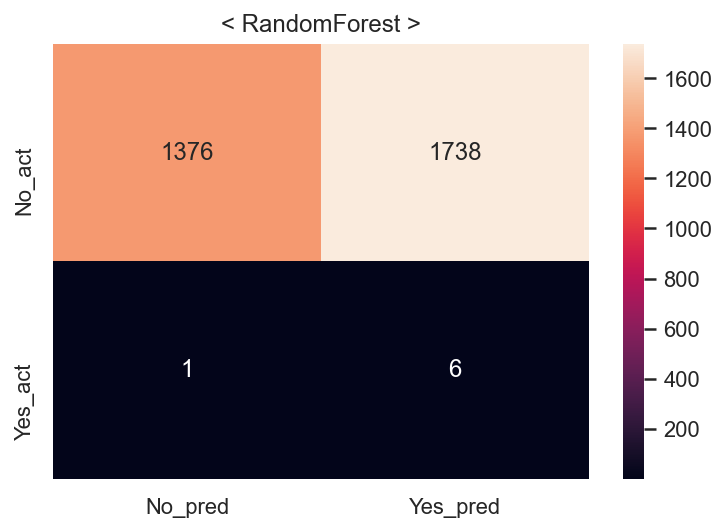

Fitting 5 folds for each of 12 candidates, totalling 60 fits
====Done Evaluation====
====Done Evaluation====


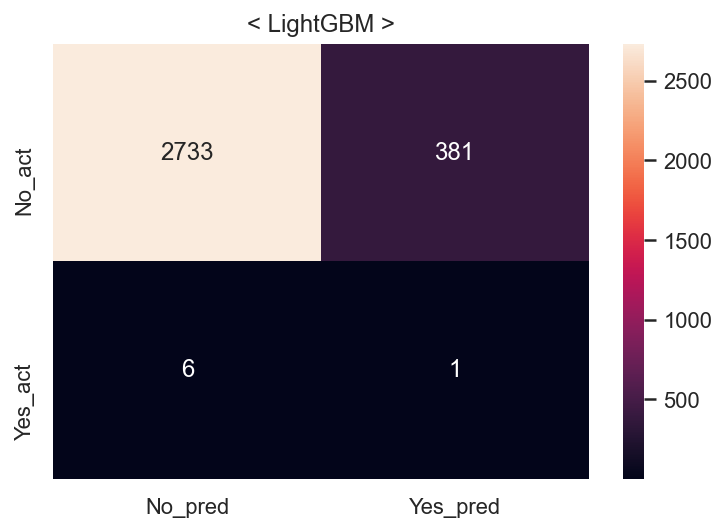

Fitting 5 folds for each of 1 candidates, totalling 5 fits
====Done Evaluation====
====Done Evaluation====


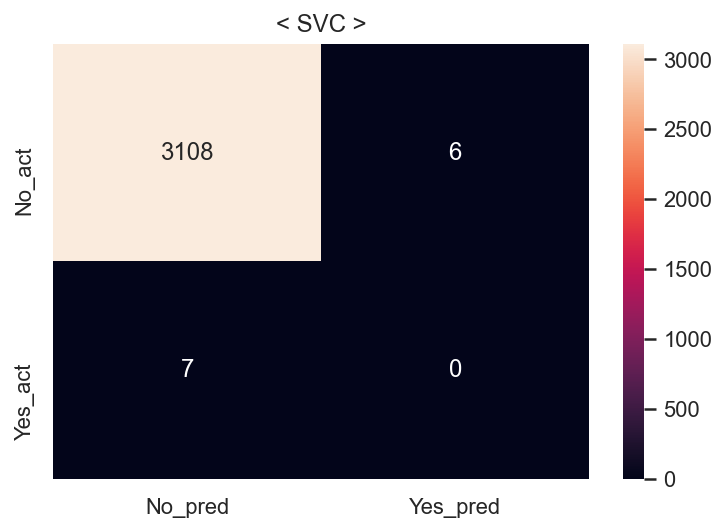

Fit time : 0.43 min


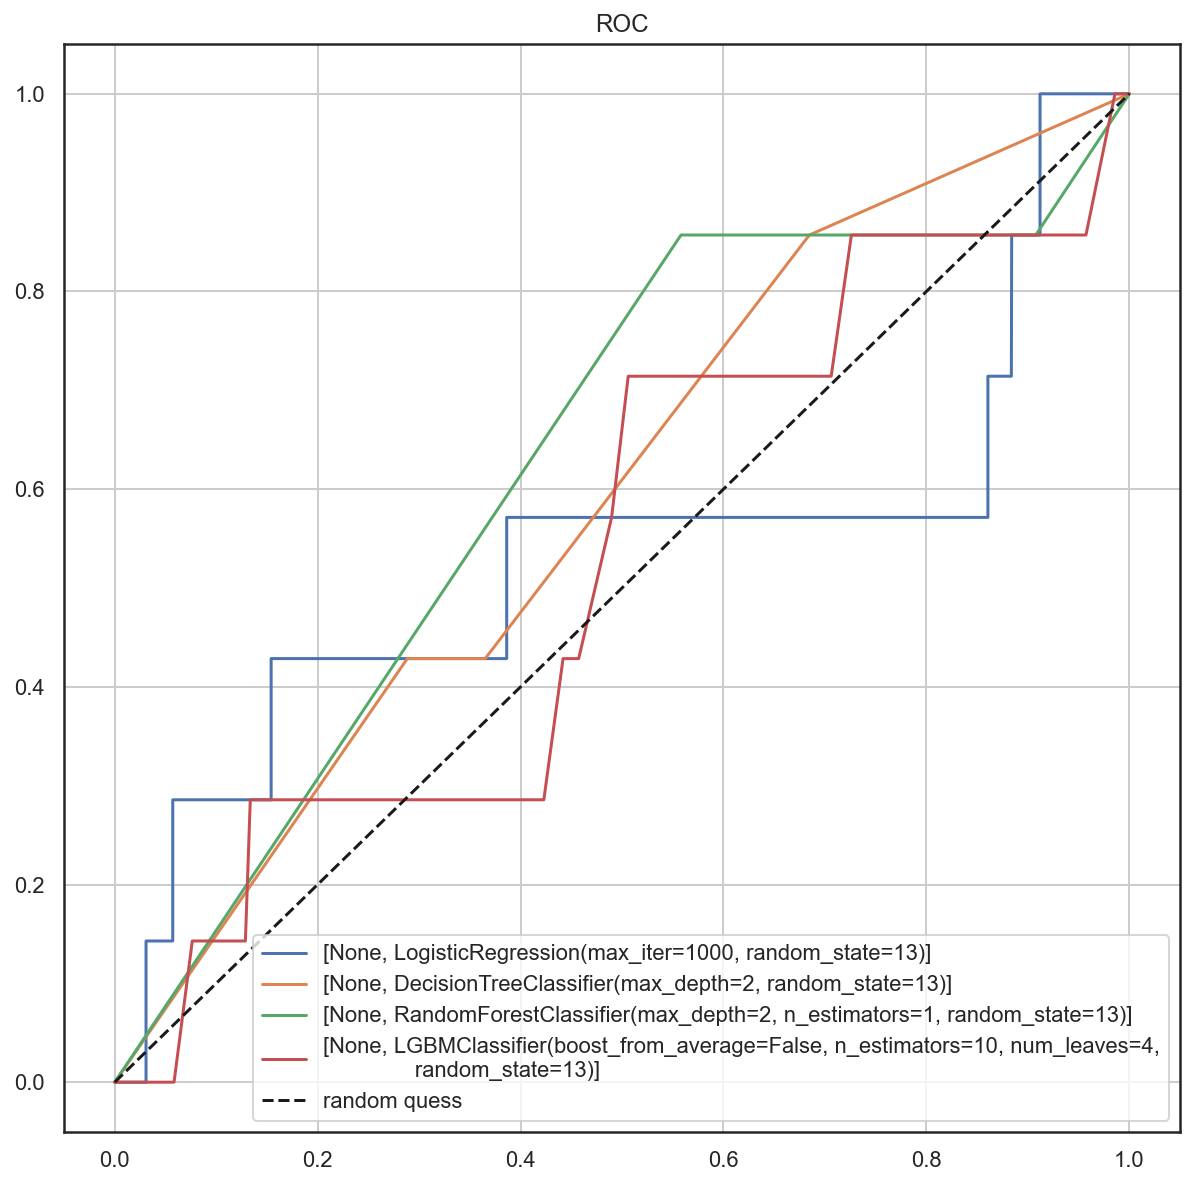

In [15]:
_, result_df1 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='No')

In [19]:
result_df1["null_del"] = [1]  * len(result_df1)
result_df1["encoded"] = [1]  * len(result_df1)
result_df1["scaler"] = ["None"]  * len(result_df1)
result_df1["sampler"] = ["BdlSMOTE"]  * len(result_df1)
result_df1 = result_df1[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df1

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         1        1   None  BdlSMOTE   LogisticReg        0.998672   
1         1        1   None  BdlSMOTE  DecisionTree        0.864456   
2         1        1   None  BdlSMOTE  RandomForest        0.813574   
3         1        1   None  BdlSMOTE      LightGBM        0.960286   
4         1        1   None  BdlSMOTE           SVC        0.998282   

   train precision  train recall  train f1  train auc  test accuracy  \
0         1.000000      0.997345  0.998671   0.998672       0.997437   
1         0.787612      0.998047  0.880430   0.864456       0.710990   
2         0.728723      0.999063  0.842743   0.813574       0.442807   
3         0.928151      0.997813  0.961722   0.960286       0.876001   
4         0.998905      0.997657  0.998281   0.998282       0.995835   

   test precision  test recall   test f1  test auc  
0        0.000000     0.000000  0.000000  0.499839  
1        0.003330     0.428571  0.006608  0.570098  
2        0.003440     0.857143  0.006853  0.649509  
3        0.002618     0.142857  0.005141  0.510253  
4        0.000000     0.000000  0.000000  0.499037

### (2) null_del = Y , encoded = Y , scaler = MM

In [20]:
# null_del
socar_delete = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# 1hot
cat_attribs = socar_delete.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cnt', 'test_set',
                                         'sharing_type', 'has_previous_accident', 'socarpass', 'socarsave', 'car_part1', 'car_part2'])
socar_df = pd.get_dummies(socar_delete, columns=cat_attribs)
# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')

==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]


In [21]:
len(socar_df.columns)

53

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.2s
====Done Evaluation====
====Done Evaluation====


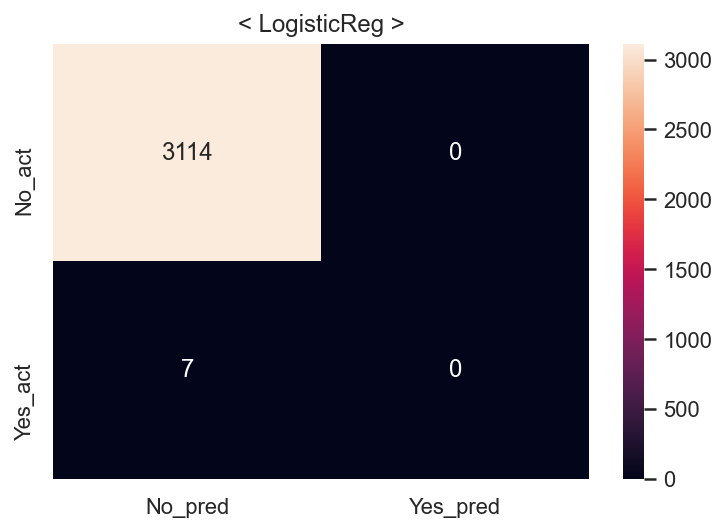

Fitting 5 folds for each of 4 candidates, totalling 20 fits
====Done Evaluation====
====Done Evaluation====


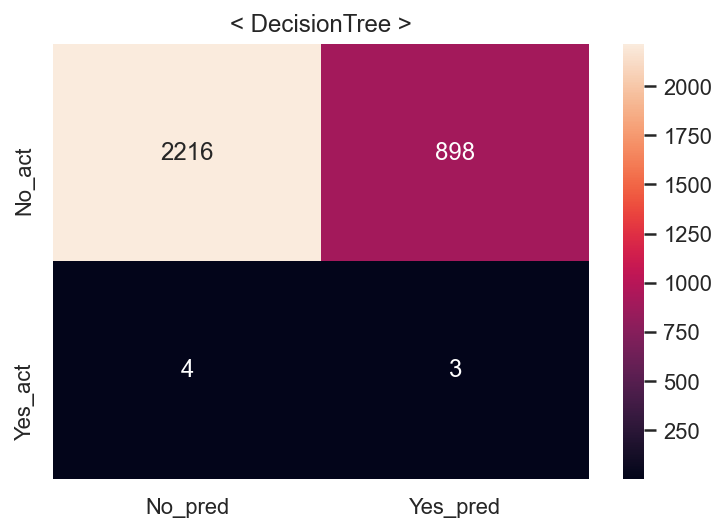

Fitting 5 folds for each of 28 candidates, totalling 140 fits
====Done Evaluation====
====Done Evaluation====


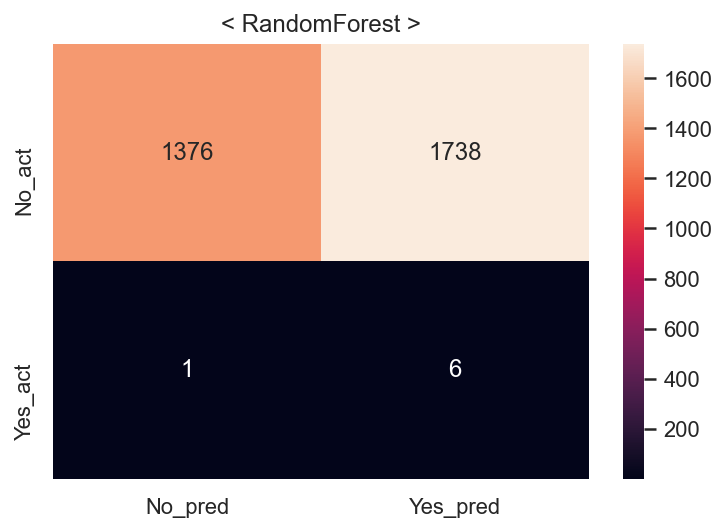

Fitting 5 folds for each of 12 candidates, totalling 60 fits
====Done Evaluation====
====Done Evaluation====


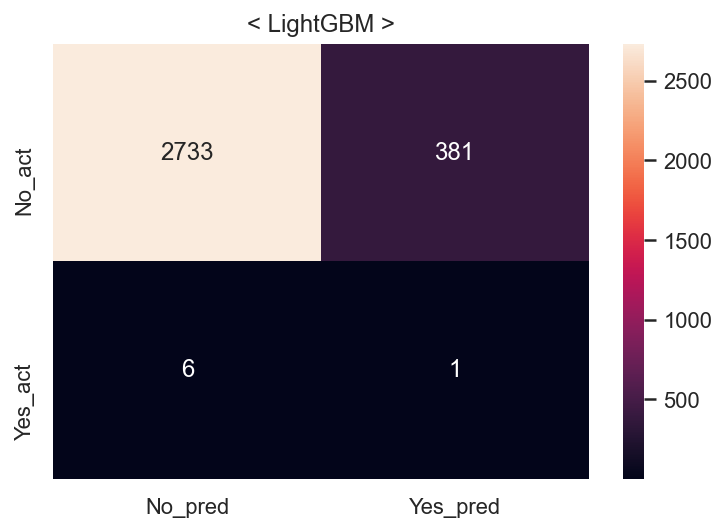

Fitting 5 folds for each of 1 candidates, totalling 5 fits
====Done Evaluation====
====Done Evaluation====


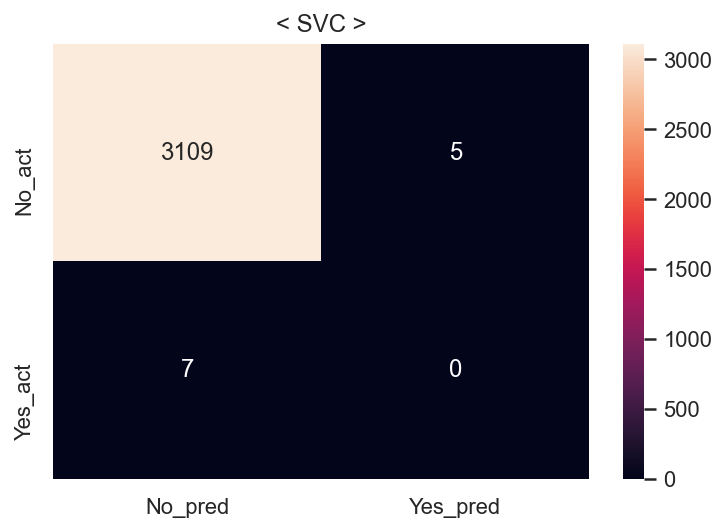

Fit time : 0.21 min


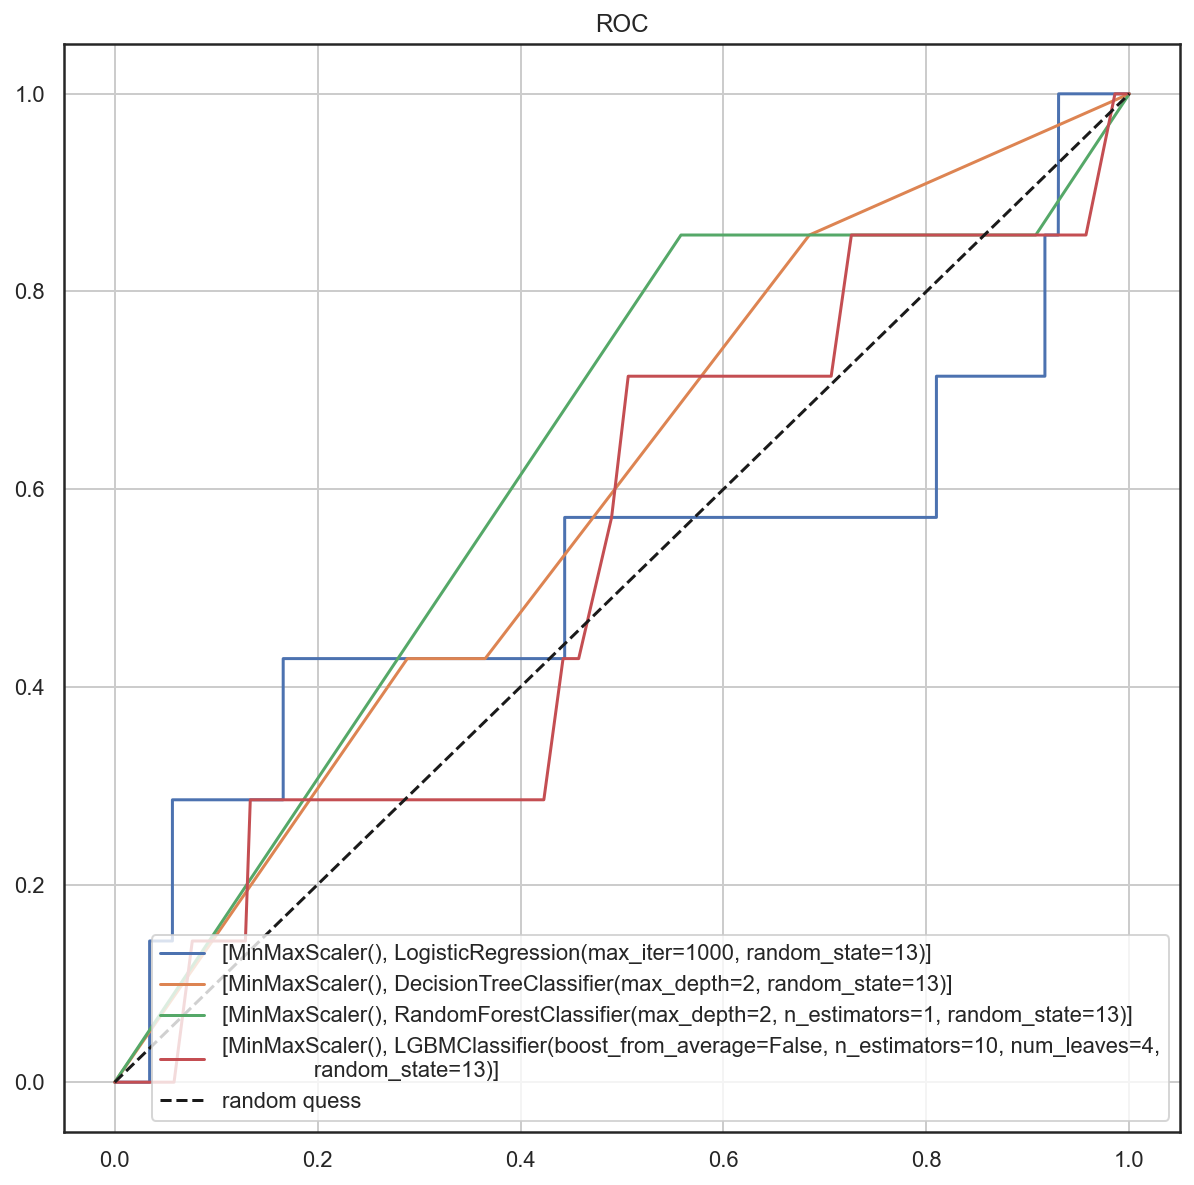

In [22]:
_, result_df2 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='MM')

In [23]:
result_df2["null_del"] = [1]  * len(result_df2)
result_df2["encoded"] = [1]  * len(result_df2)
result_df2["scaler"] = ["MM"]  * len(result_df2)
result_df2["sampler"] = ["BdlSMOTE"]  * len(result_df2)
result_df2 = result_df2[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df2

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         1        1     MM  BdlSMOTE   LogisticReg        0.998672   
1         1        1     MM  BdlSMOTE  DecisionTree        0.864456   
2         1        1     MM  BdlSMOTE  RandomForest        0.813574   
3         1        1     MM  BdlSMOTE      LightGBM        0.960286   
4         1        1     MM  BdlSMOTE           SVC        0.999844   

   train precision  train recall  train f1  train auc  test accuracy  \
0         1.000000      0.997345  0.998671   0.998672       0.997757   
1         0.787612      0.998047  0.880430   0.864456       0.710990   
2         0.728723      0.999063  0.842743   0.813574       0.442807   
3         0.928151      0.997813  0.961722   0.960286       0.876001   
4         1.000000      0.999688  0.999844   0.999844       0.996155   

   test precision  test recall   test f1  test auc  
0        0.000000     0.000000  0.000000  0.500000  
1        0.003330     0.428571  0.006608  0.570098  
2        0.003440     0.857143  0.006853  0.649509  
3        0.002618     0.142857  0.005141  0.510253  
4        0.000000     0.000000  0.000000  0.499197

### (3) null_del = Y , encoded = Y , scaler = SD

In [24]:
# null_del
socar_delete = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# 1hot
cat_attribs = socar_delete.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cnt', 'test_set',
                                         'sharing_type', 'has_previous_accident', 'socarpass', 'socarsave', 'car_part1', 'car_part2'])
socar_df = pd.get_dummies(socar_delete, columns=cat_attribs)
# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')

==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


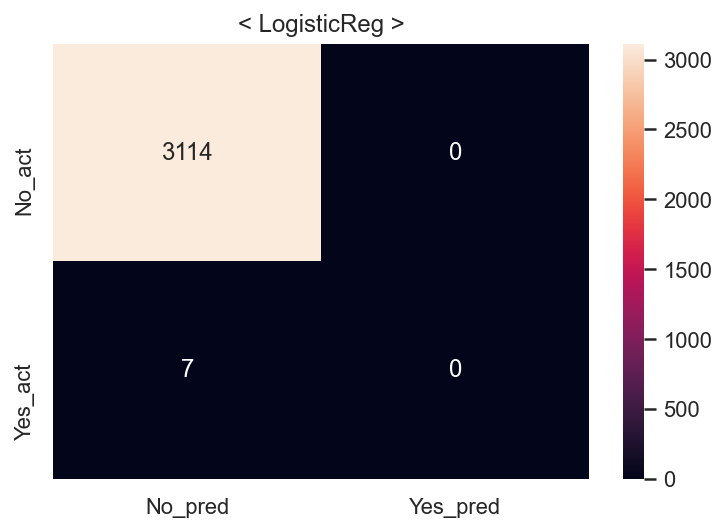

Fitting 5 folds for each of 4 candidates, totalling 20 fits
====Done Evaluation====
====Done Evaluation====


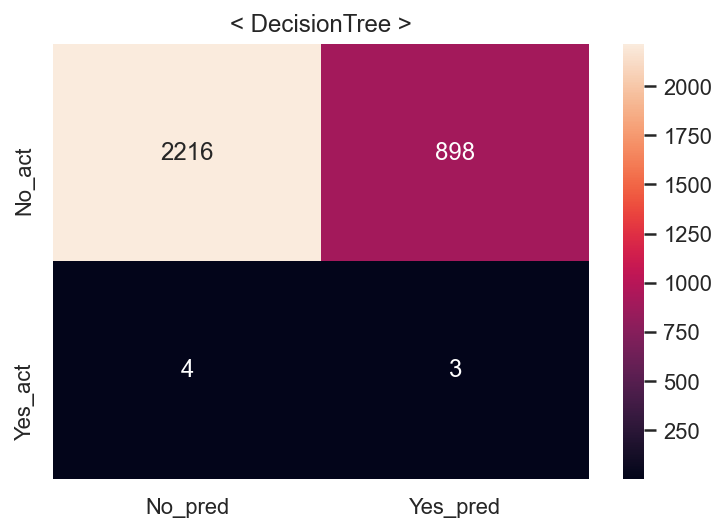

Fitting 5 folds for each of 28 candidates, totalling 140 fits
====Done Evaluation====
====Done Evaluation====


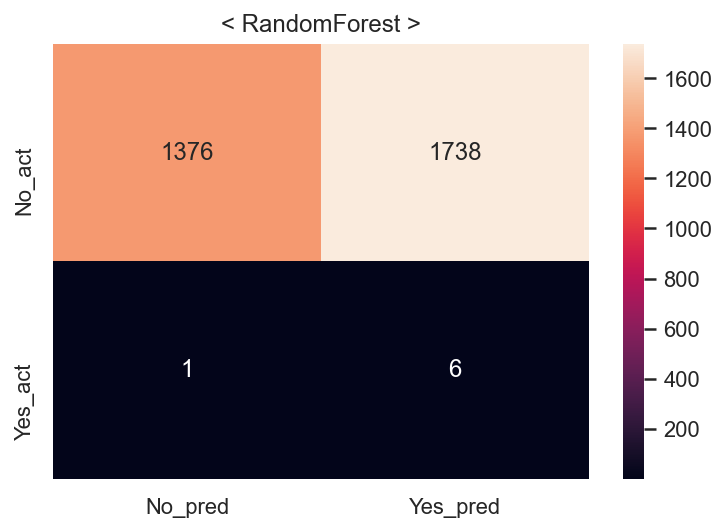

Fitting 5 folds for each of 12 candidates, totalling 60 fits
====Done Evaluation====
====Done Evaluation====


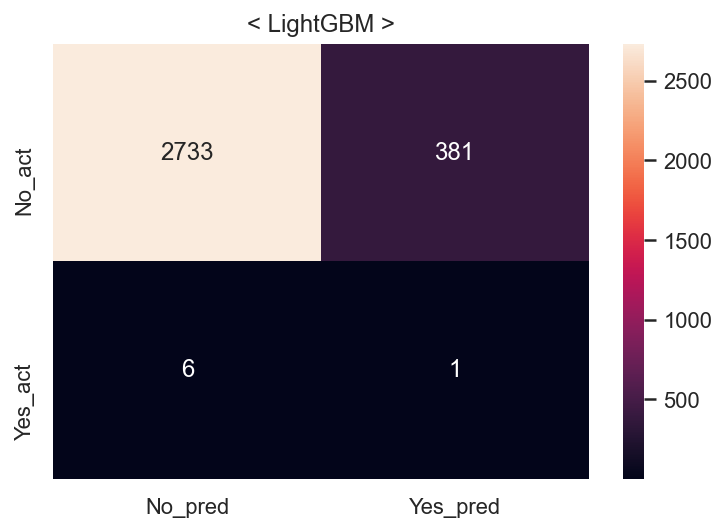

Fitting 5 folds for each of 1 candidates, totalling 5 fits
====Done Evaluation====
====Done Evaluation====


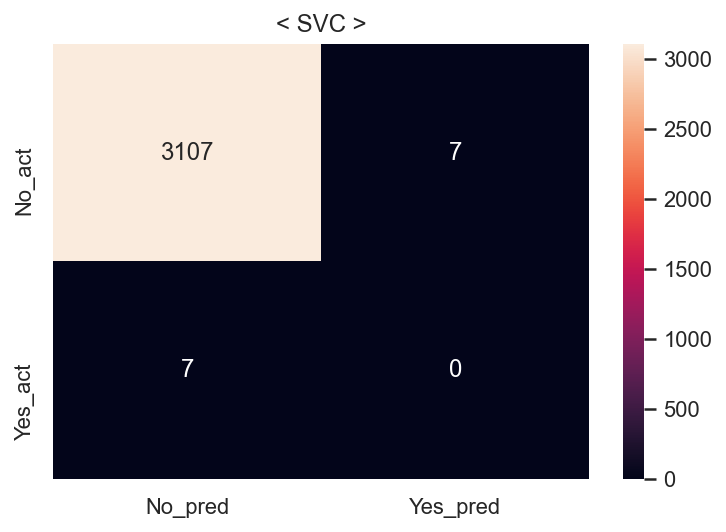

Fit time : 0.33 min


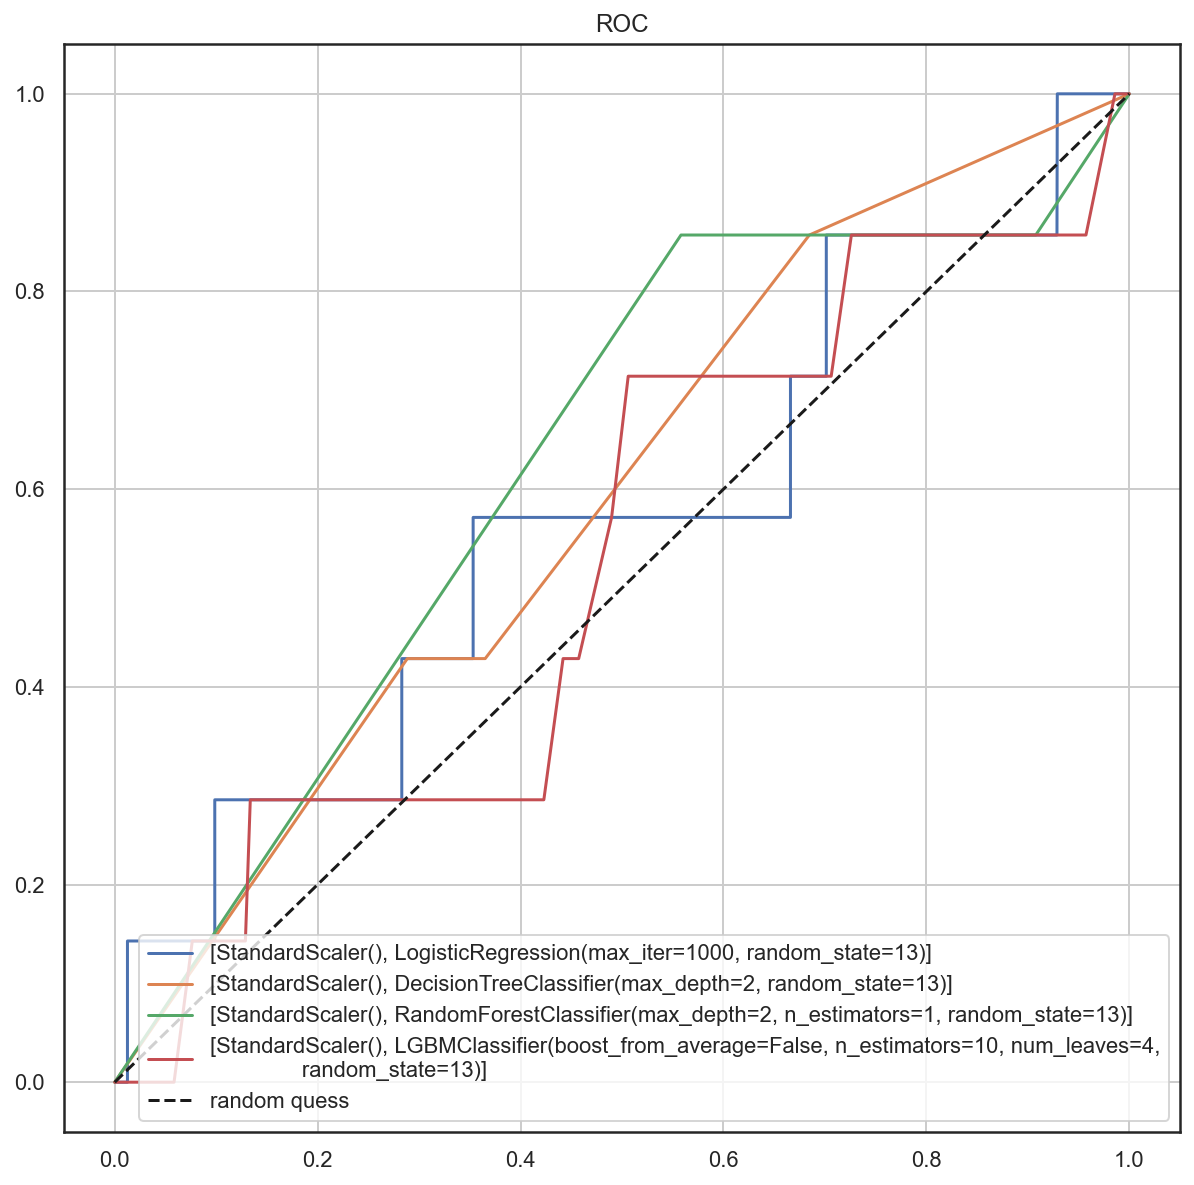

In [25]:
_, result_df3 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='SD')

In [26]:
result_df3["null_del"] = [1]  * len(result_df3)
result_df3["encoded"] = [1]  * len(result_df3)
result_df3["scaler"] = ["SD"]  * len(result_df3)
result_df3["sampler"] = ["BdlSMOTE"]  * len(result_df3)
result_df3 = result_df3[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df3

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         1        1     SD  BdlSMOTE   LogisticReg        0.998672   
1         1        1     SD  BdlSMOTE  DecisionTree        0.864456   
2         1        1     SD  BdlSMOTE  RandomForest        0.813574   
3         1        1     SD  BdlSMOTE      LightGBM        0.960286   
4         1        1     SD  BdlSMOTE           SVC        0.999727   

   train precision  train recall  train f1  train auc  test accuracy  \
0         1.000000      0.997345  0.998671   0.998672       0.997757   
1         0.787612      0.998047  0.880430   0.864456       0.710990   
2         0.728723      0.999063  0.842743   0.813574       0.442807   
3         0.928151      0.997813  0.961722   0.960286       0.876001   
4         1.000000      0.999453  0.999727   0.999727       0.995514   

   test precision  test recall   test f1  test auc  
0        0.000000     0.000000  0.000000  0.500000  
1        0.003330     0.428571  0.006608  0.570098  
2        0.003440     0.857143  0.006853  0.649509  
3        0.002618     0.142857  0.005141  0.510253  
4        0.000000     0.000000  0.000000  0.498876

### (4) null_del = Y , encoded = Y , scaler = RB

==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.2s
====Done Evaluation====
====Done Evaluation====


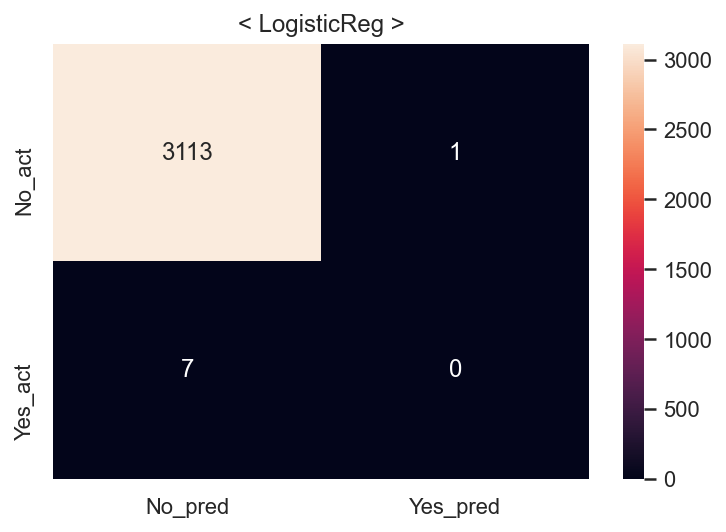

Fitting 5 folds for each of 4 candidates, totalling 20 fits
====Done Evaluation====
====Done Evaluation====


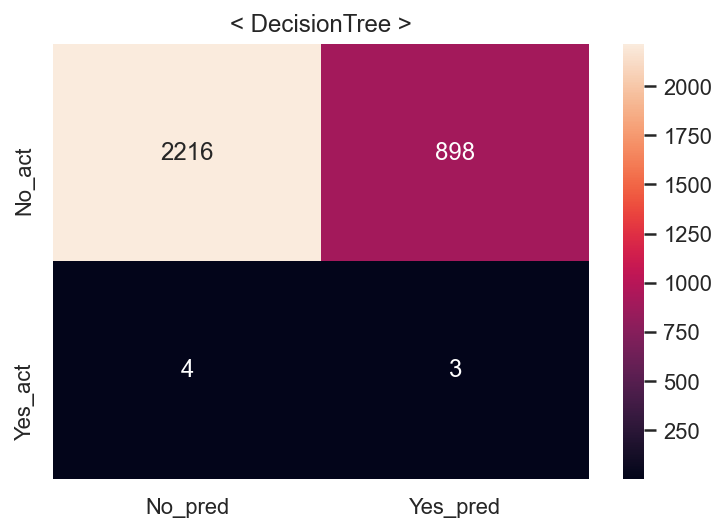

Fitting 5 folds for each of 28 candidates, totalling 140 fits
====Done Evaluation====
====Done Evaluation====


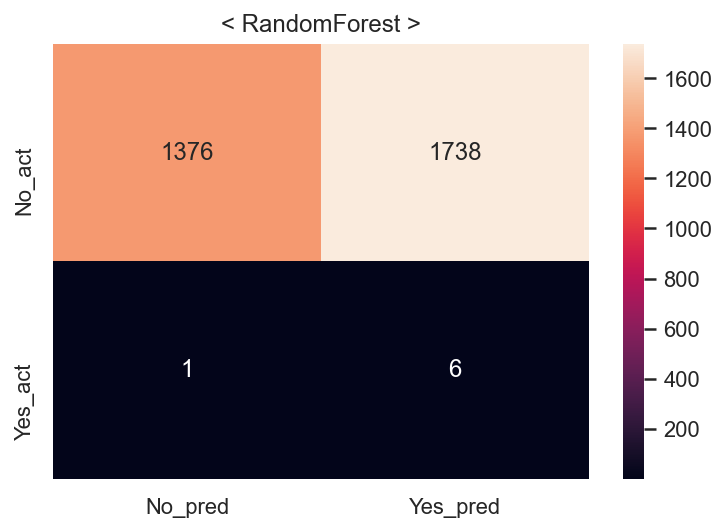

Fitting 5 folds for each of 12 candidates, totalling 60 fits
====Done Evaluation====
====Done Evaluation====


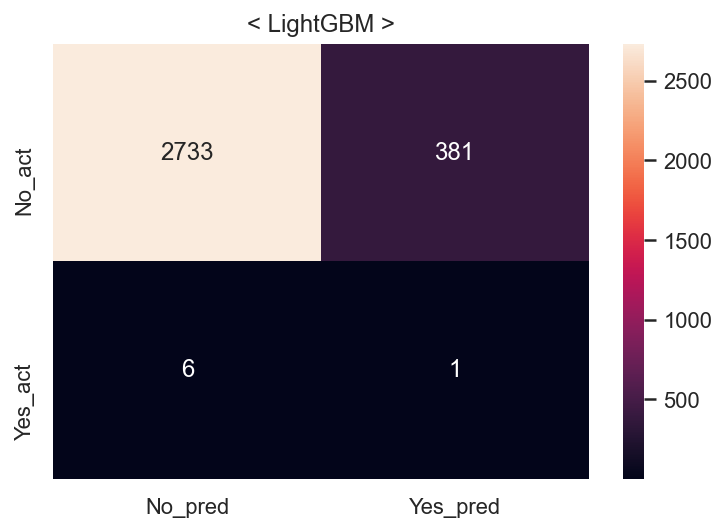

Fitting 5 folds for each of 1 candidates, totalling 5 fits
====Done Evaluation====
====Done Evaluation====


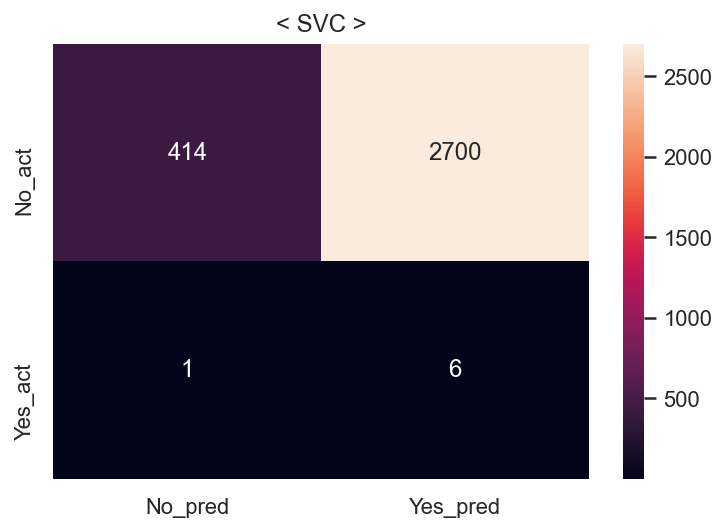

Fit time : 2.14 min


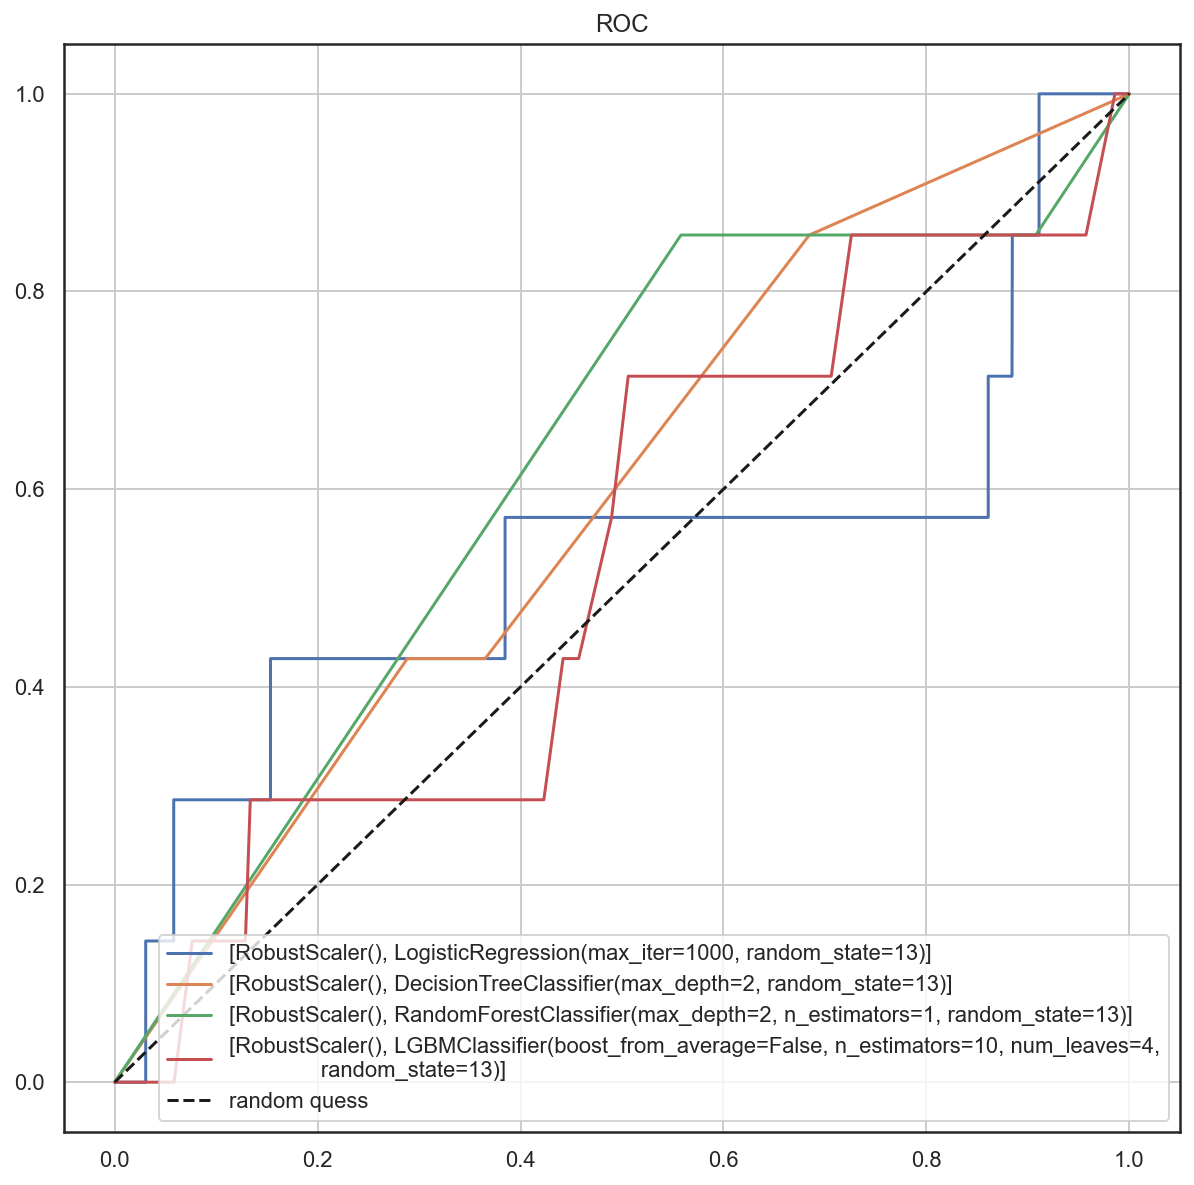

In [27]:
# null_del
socar_delete = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# 1hot
cat_attribs = socar_delete.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cnt', 'test_set',
                                         'sharing_type', 'has_previous_accident', 'socarpass', 'socarsave', 'car_part1', 'car_part2'])
socar_df = pd.get_dummies(socar_delete, columns=cat_attribs)
# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')


_, result_df4 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='RB')

In [28]:
result_df4["null_del"] = [1]  * len(result_df4)
result_df4["encoded"] = [1]  * len(result_df4)
result_df4["scaler"] = ["RB"]  * len(result_df4)
result_df4["sampler"] = ["BdlSMOTE"]  * len(result_df4)
result_df4 = result_df3[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df4

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         1        1     SD  BdlSMOTE   LogisticReg        0.998672   
1         1        1     SD  BdlSMOTE  DecisionTree        0.864456   
2         1        1     SD  BdlSMOTE  RandomForest        0.813574   
3         1        1     SD  BdlSMOTE      LightGBM        0.960286   
4         1        1     SD  BdlSMOTE           SVC        0.999727   

   train precision  train recall  train f1  train auc  test accuracy  \
0         1.000000      0.997345  0.998671   0.998672       0.997757   
1         0.787612      0.998047  0.880430   0.864456       0.710990   
2         0.728723      0.999063  0.842743   0.813574       0.442807   
3         0.928151      0.997813  0.961722   0.960286       0.876001   
4         1.000000      0.999453  0.999727   0.999727       0.995514   

   test precision  test recall   test f1  test auc  
0        0.000000     0.000000  0.000000  0.500000  
1        0.003330     0.428571  0.006608  0.570098  
2        0.003440     0.857143  0.006853  0.649509  
3        0.002618     0.142857  0.005141  0.510253  
4        0.000000     0.000000  0.000000  0.498876

### (5) null_del = Y , encoded = N , scaler = None

==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   1.9s
====Done Evaluation====
====Done Evaluation====


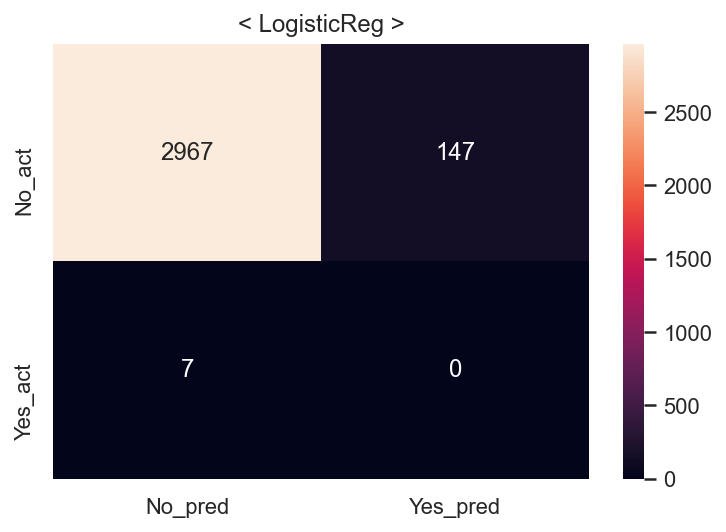

Fitting 5 folds for each of 4 candidates, totalling 20 fits
====Done Evaluation====
====Done Evaluation====


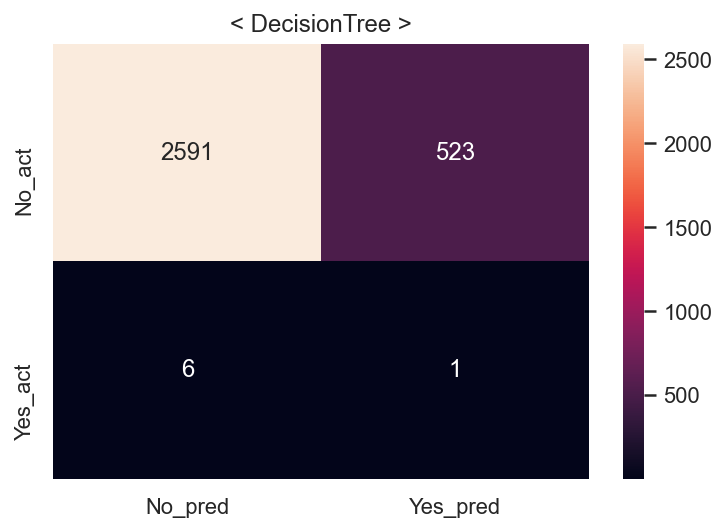

Fitting 5 folds for each of 28 candidates, totalling 140 fits
====Done Evaluation====
====Done Evaluation====


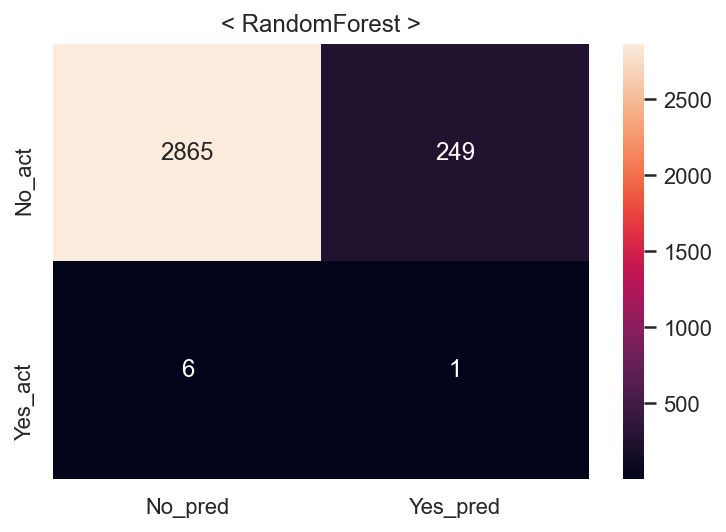

Fitting 5 folds for each of 12 candidates, totalling 60 fits
====Done Evaluation====
====Done Evaluation====


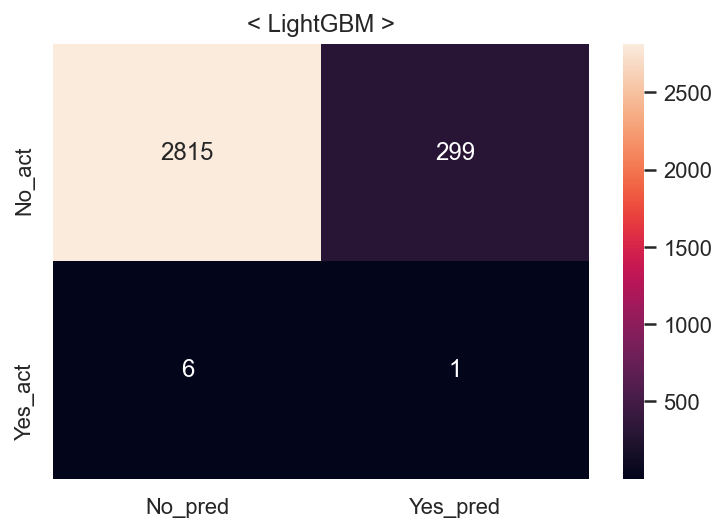

Fitting 5 folds for each of 1 candidates, totalling 5 fits
====Done Evaluation====
====Done Evaluation====


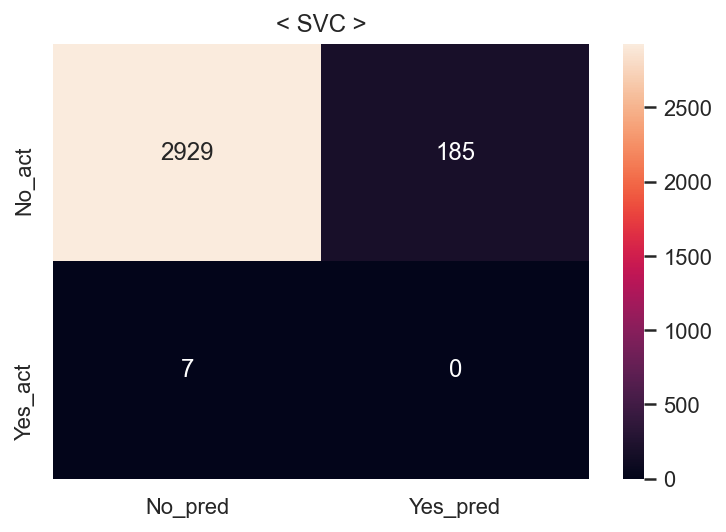

Fit time : 0.54 min


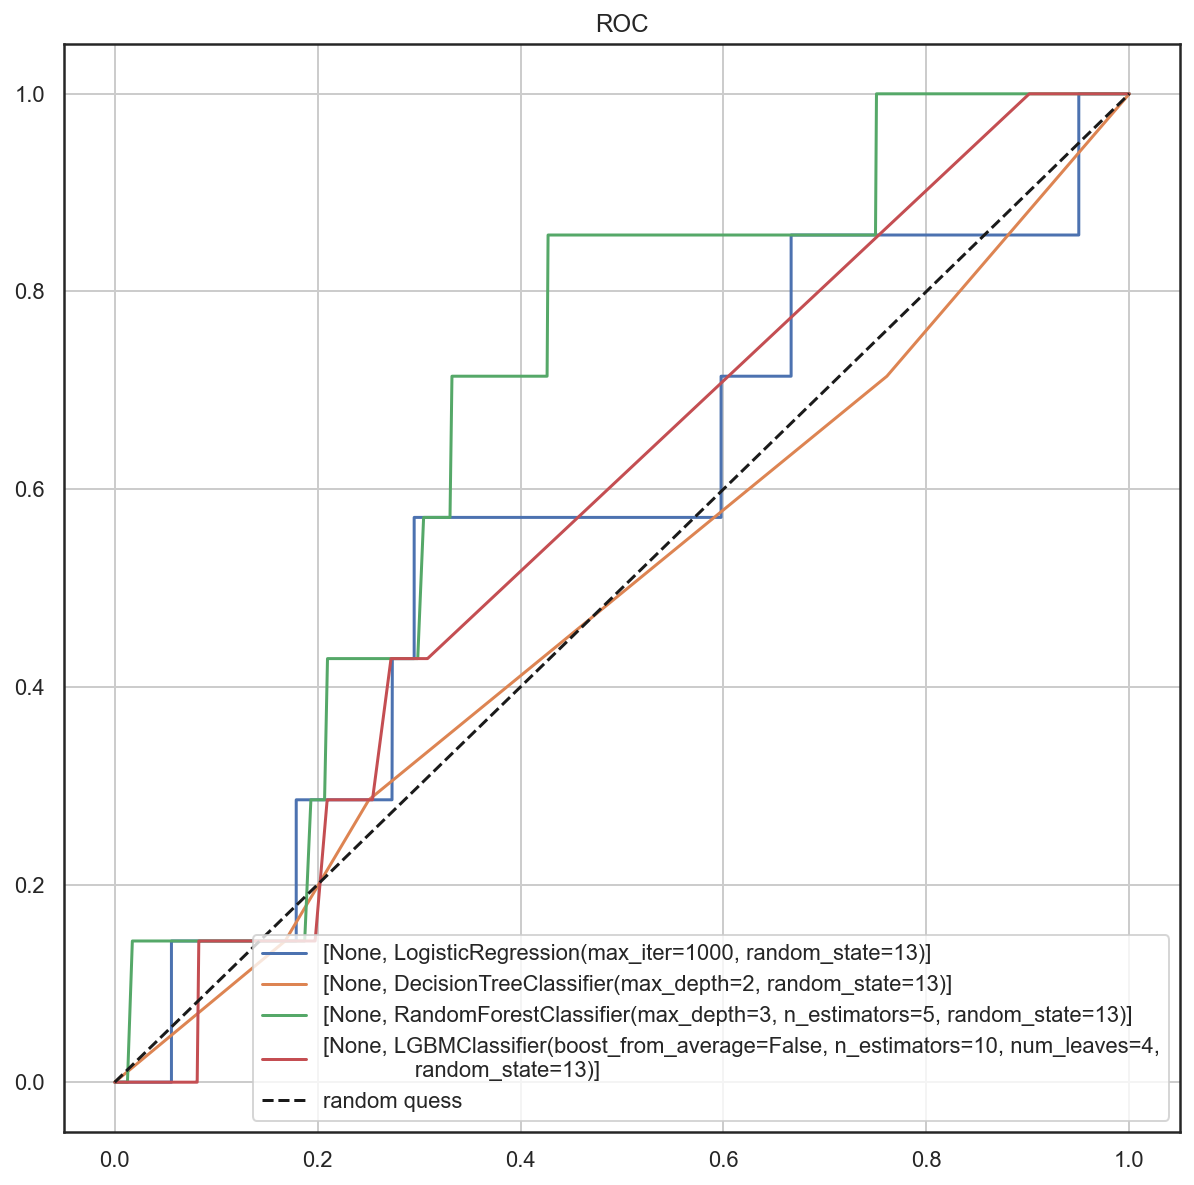

In [34]:
# null_del
socar_df = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# # 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')


_, result_df5 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='No')

In [35]:
result_df5["null_del"] = [1]  * len(result_df5)
result_df5["encoded"] = [0]  * len(result_df5)
result_df5["scaler"] = ["None"]  * len(result_df5)
result_df5["sampler"] = ["BdlSMOTE"]  * len(result_df5)
result_df5 = result_df5[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df5

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         1        0   None  BdlSMOTE   LogisticReg        0.971962   
1         1        0   None  BdlSMOTE  DecisionTree        0.912371   
2         1        0   None  BdlSMOTE  RandomForest        0.964933   
3         1        0   None  BdlSMOTE      LightGBM        0.949898   
4         1        0   None  BdlSMOTE           SVC        0.966456   

   train precision  train recall  train f1  train auc  test accuracy  \
0         0.949093      0.997423  0.972658   0.971962       0.950657   
1         0.852188      0.997813  0.919269   0.912371       0.830503   
2         0.936373      0.997657  0.966044   0.964933       0.918295   
3         0.910731      0.997579  0.952179   0.949898       0.902275   
4         0.939187      0.997501  0.967466   0.966456       0.938481   

   test precision  test recall   test f1  test auc  
0        0.000000     0.000000  0.000000  0.476397  
1        0.001908     0.142857  0.003766  0.487453  
2        0.004000     0.142857  0.007782  0.531448  
3        0.003333     0.142857  0.006515  0.523420  
4        0.000000     0.000000  0.000000  0.470295

### (6) null_del = Y , encoded = N , scaler = MM

==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.2s
====Done Evaluation====
====Done Evaluation====


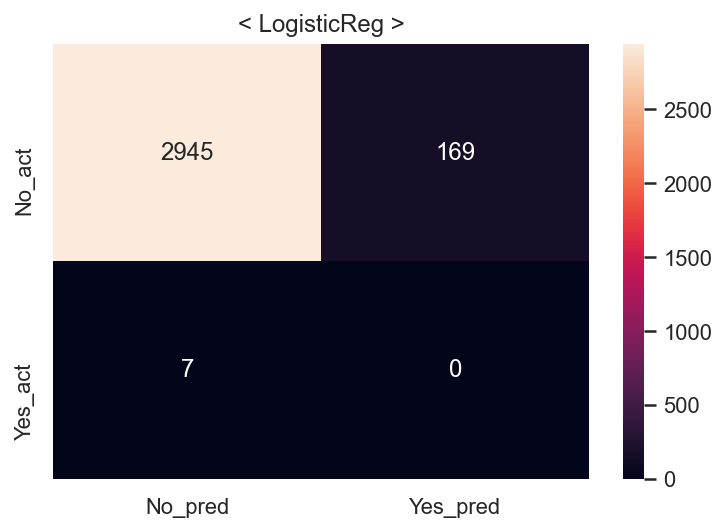

Fitting 5 folds for each of 4 candidates, totalling 20 fits
====Done Evaluation====
====Done Evaluation====


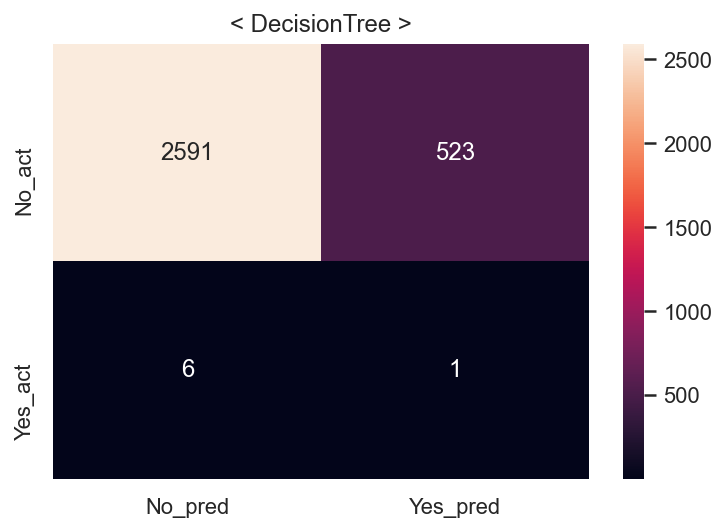

Fitting 5 folds for each of 28 candidates, totalling 140 fits
====Done Evaluation====
====Done Evaluation====


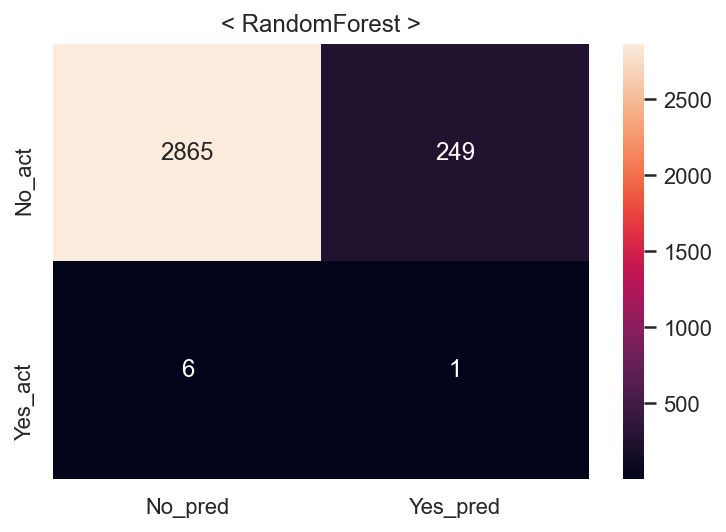

Fitting 5 folds for each of 12 candidates, totalling 60 fits
====Done Evaluation====
====Done Evaluation====


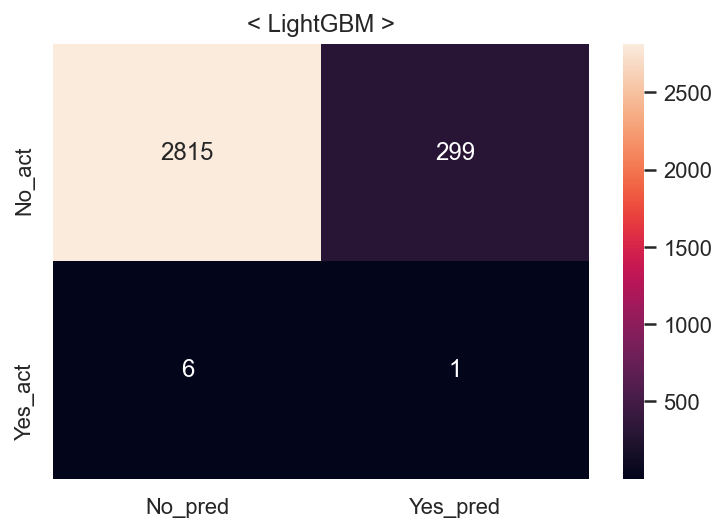

Fitting 5 folds for each of 1 candidates, totalling 5 fits
====Done Evaluation====
====Done Evaluation====


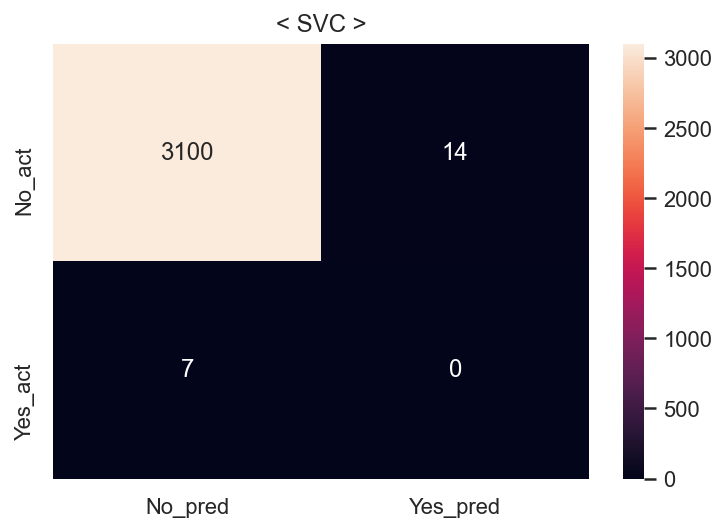

Fit time : 0.23 min


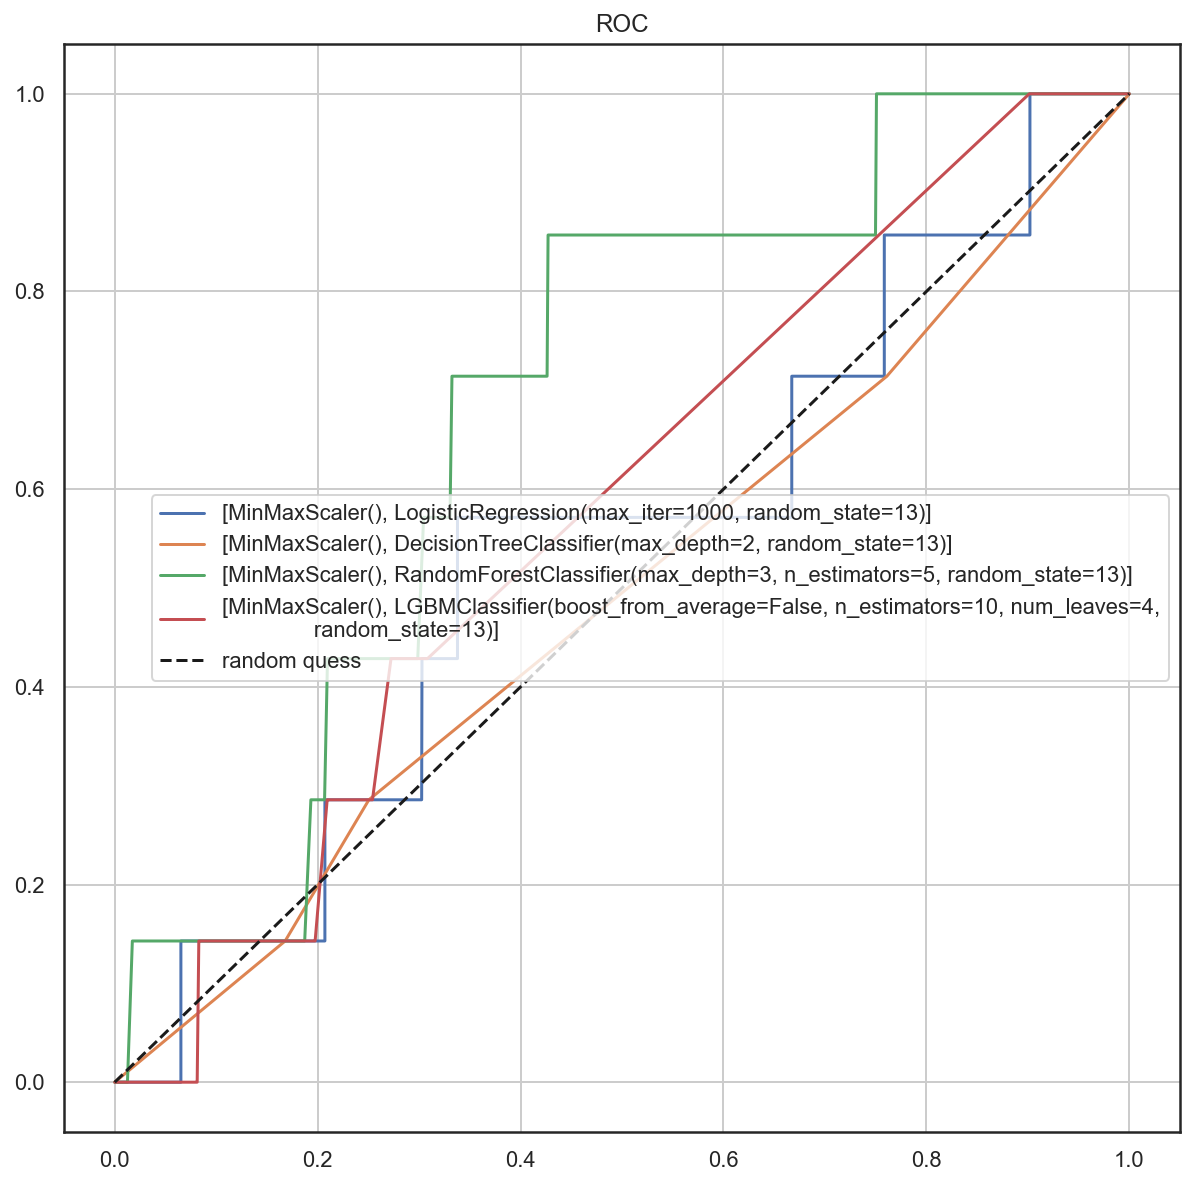

In [36]:
# null_del
socar_df = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# # 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')


_, result_df6 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='MM')

In [37]:
result_df6["null_del"] = [1]  * len(result_df6)
result_df6["encoded"] = [0]  * len(result_df6)
result_df6["scaler"] = ["MM"]  * len(result_df6)
result_df6["sampler"] = ["BdlSMOTE"]  * len(result_df6)
result_df6 = result_df6[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df6

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         1        0     MM  BdlSMOTE   LogisticReg        0.968877   
1         1        0     MM  BdlSMOTE  DecisionTree        0.912371   
2         1        0     MM  BdlSMOTE  RandomForest        0.964933   
3         1        0     MM  BdlSMOTE      LightGBM        0.949898   
4         1        0     MM  BdlSMOTE           SVC        0.997735   

   train precision  train recall  train f1  train auc  test accuracy  \
0         0.943554      0.997423  0.969741   0.968877       0.943608   
1         0.852188      0.997813  0.919269   0.912371       0.830503   
2         0.936373      0.997657  0.966044   0.964933       0.918295   
3         0.910731      0.997579  0.952179   0.949898       0.902275   
4         0.997735      0.997735  0.997735   0.997735       0.993271   

   test precision  test recall   test f1  test auc  
0        0.000000     0.000000  0.000000  0.472864  
1        0.001908     0.142857  0.003766  0.487453  
2        0.004000     0.142857  0.007782  0.531448  
3        0.003333     0.142857  0.006515  0.523420  
4        0.000000     0.000000  0.000000  0.497752

### (7) null_del = Y , encoded = N , scaler = SD

==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


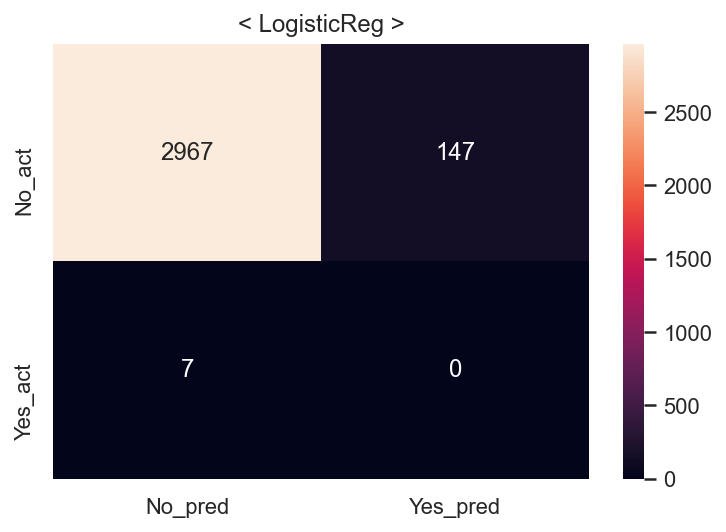

Fitting 5 folds for each of 4 candidates, totalling 20 fits
====Done Evaluation====
====Done Evaluation====


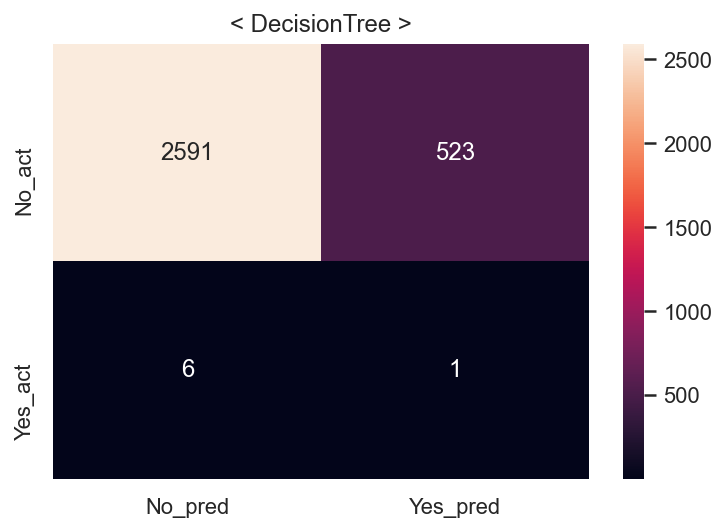

Fitting 5 folds for each of 28 candidates, totalling 140 fits
====Done Evaluation====
====Done Evaluation====


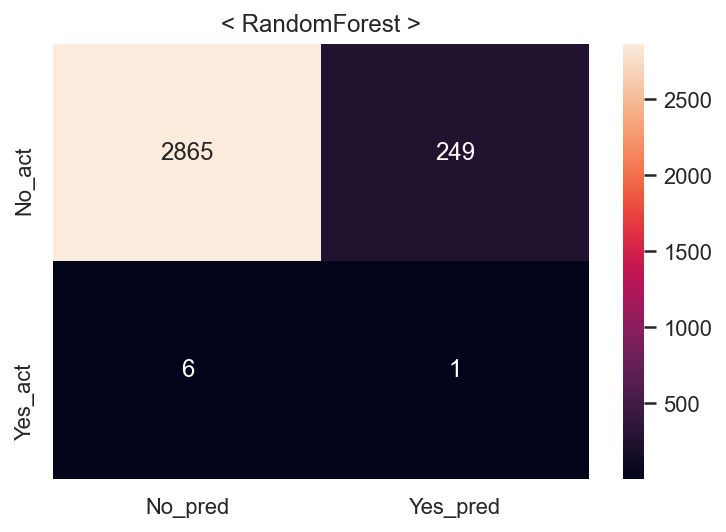

Fitting 5 folds for each of 12 candidates, totalling 60 fits
====Done Evaluation====
====Done Evaluation====


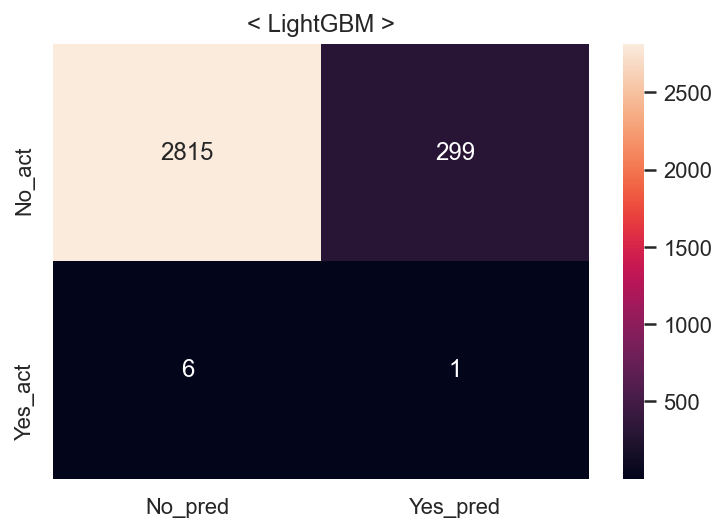

Fitting 5 folds for each of 1 candidates, totalling 5 fits
====Done Evaluation====
====Done Evaluation====


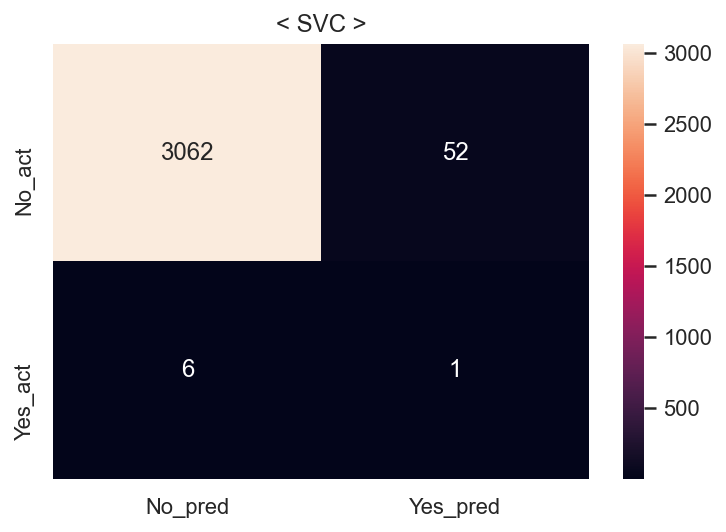

Fit time : 0.35 min


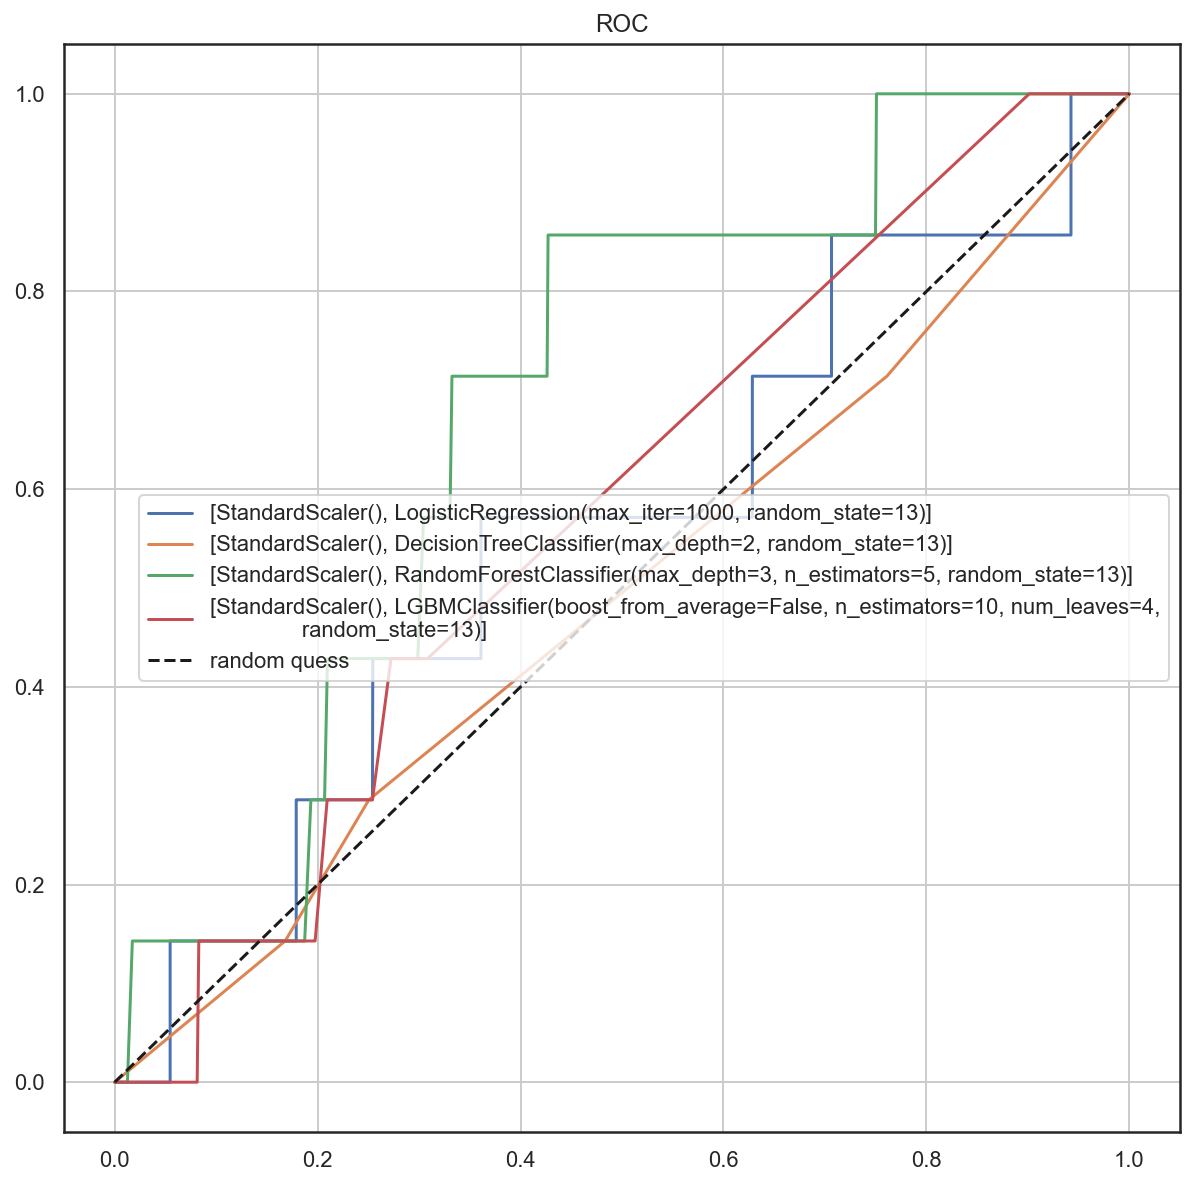

In [42]:
# null_del
socar_df = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# # 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')


_, result_df7 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='SD')

In [43]:
result_df7["null_del"] = [1]  * len(result_df7)
result_df7["encoded"] = [0]  * len(result_df7)
result_df7["scaler"] = ["SD"]  * len(result_df7)
result_df7["sampler"] = ["BdlSMOTE"]  * len(result_df7)
result_df7 = result_df7[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df7

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         1        0     SD  BdlSMOTE   LogisticReg        0.972079   
1         1        0     SD  BdlSMOTE  DecisionTree        0.912371   
2         1        0     SD  BdlSMOTE  RandomForest        0.964933   
3         1        0     SD  BdlSMOTE      LightGBM        0.949898   
4         1        0     SD  BdlSMOTE           SVC        0.997188   

   train precision  train recall  train f1  train auc  test accuracy  \
0         0.949305      0.997423  0.972769   0.972079       0.950657   
1         0.852188      0.997813  0.919269   0.912371       0.830503   
2         0.936373      0.997657  0.966044   0.964933       0.918295   
3         0.910731      0.997579  0.952179   0.949898       0.902275   
4         0.995949      0.998438  0.997192   0.997188       0.981416   

   test precision  test recall   test f1  test auc  
0        0.000000     0.000000  0.000000  0.476397  
1        0.001908     0.142857  0.003766  0.487453  
2        0.004000     0.142857  0.007782  0.531448  
3        0.003333     0.142857  0.006515  0.523420  
4        0.018868     0.142857  0.033333  0.563079

### (8) null_del = Y , encoded = N , scaler = RB

==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


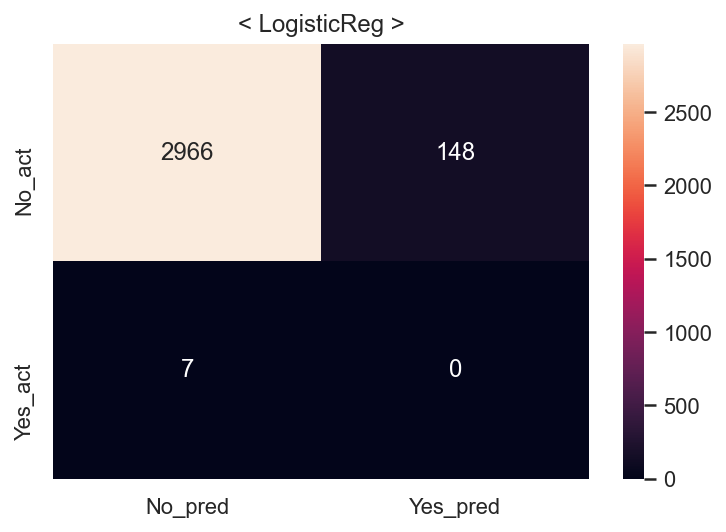

Fitting 5 folds for each of 4 candidates, totalling 20 fits
====Done Evaluation====
====Done Evaluation====


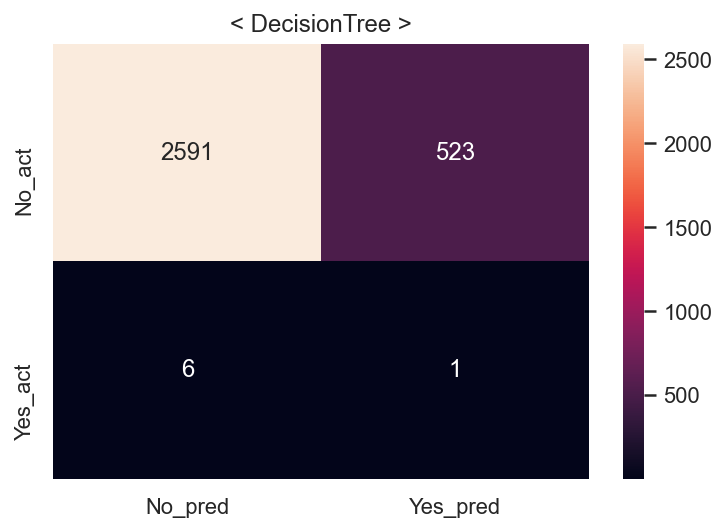

Fitting 5 folds for each of 28 candidates, totalling 140 fits
====Done Evaluation====
====Done Evaluation====


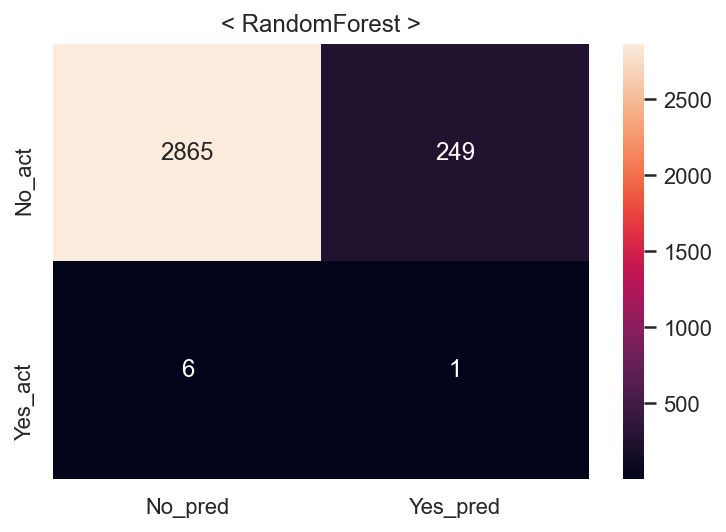

Fitting 5 folds for each of 12 candidates, totalling 60 fits
====Done Evaluation====
====Done Evaluation====


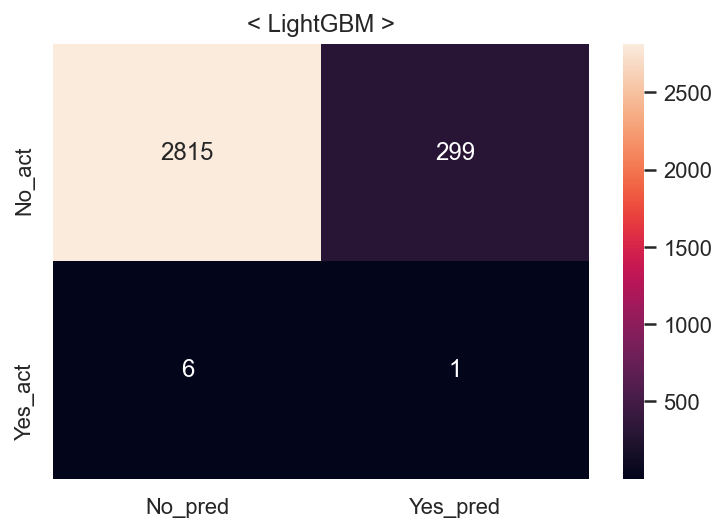

Fitting 5 folds for each of 1 candidates, totalling 5 fits
====Done Evaluation====
====Done Evaluation====


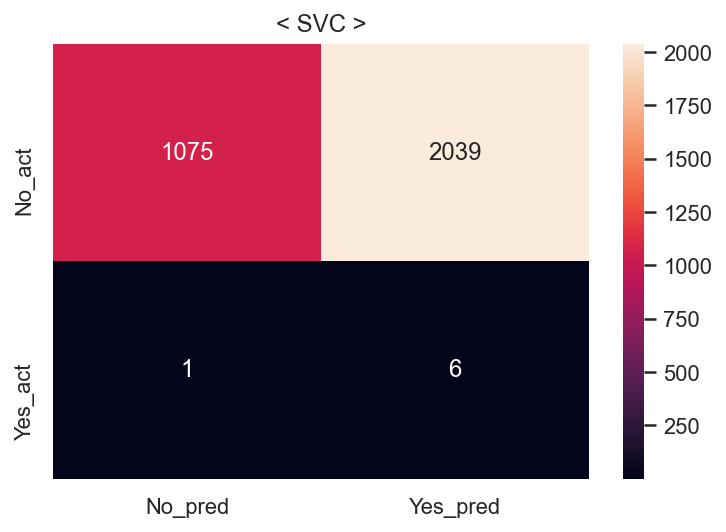

Fit time : 1.54 min


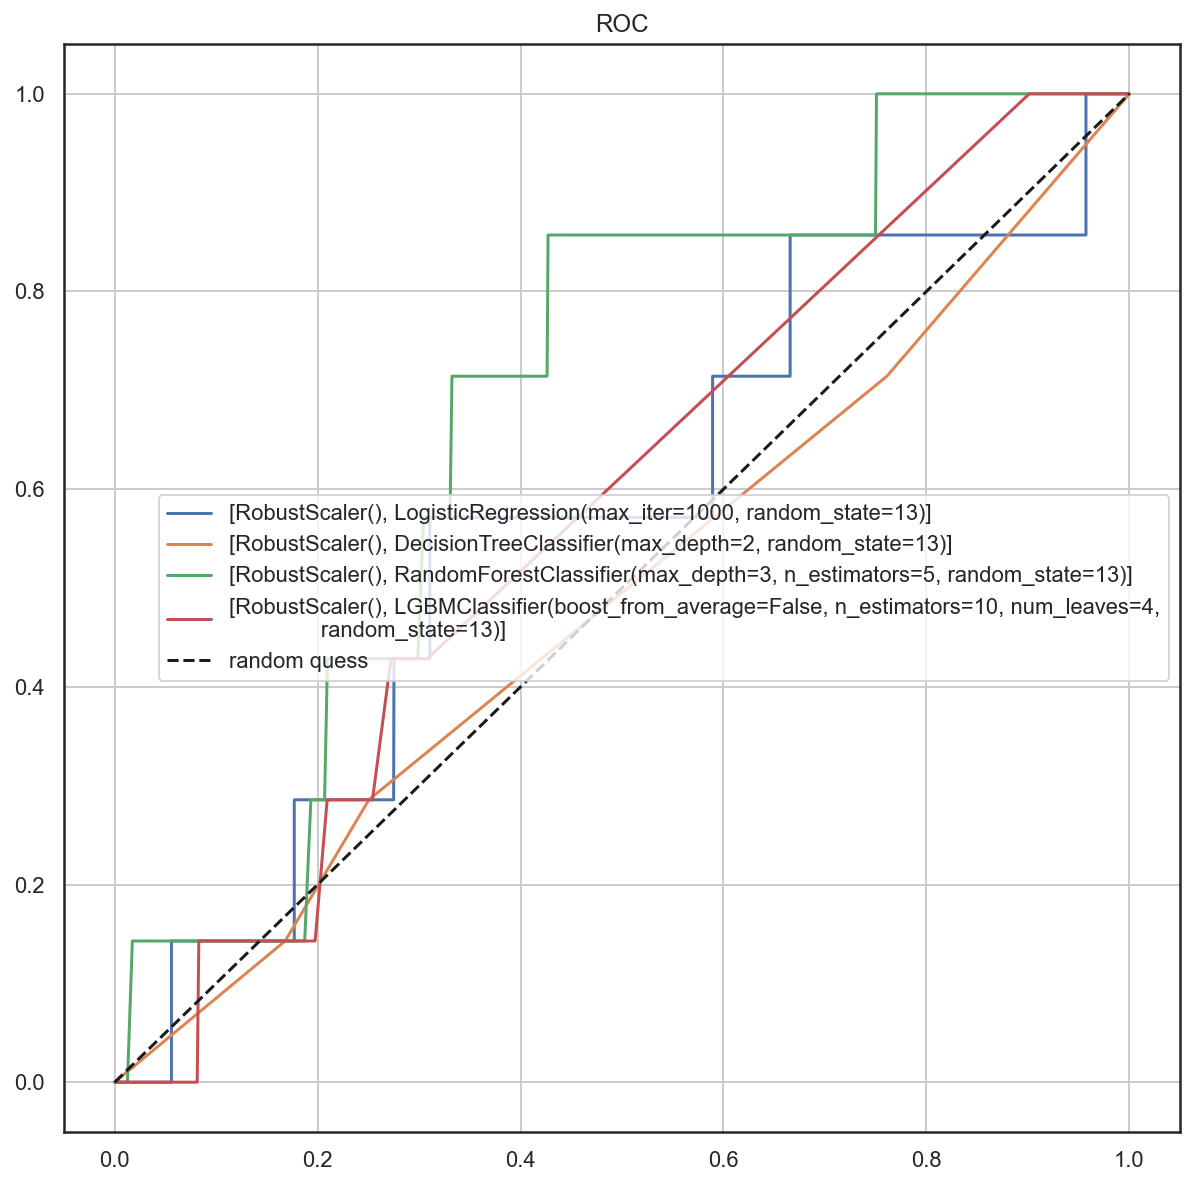

In [44]:
# null_del
socar_df = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# # 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')


_, result_df8 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='RB')

In [45]:
result_df8["null_del"] = [1] * len(result_df8)
result_df8["encoded"] = [0]  * len(result_df8)
result_df8["scaler"] = ["RB"]  * len(result_df8)
result_df8["sampler"] = ["BdlSMOTE"]  * len(result_df8)
result_df8 = result_df8[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df8

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         1        0     RB  BdlSMOTE   LogisticReg        0.971884   
1         1        0     RB  BdlSMOTE  DecisionTree        0.912371   
2         1        0     RB  BdlSMOTE  RandomForest        0.964933   
3         1        0     RB  BdlSMOTE      LightGBM        0.949898   
4         1        0     RB  BdlSMOTE           SVC        0.672173   

   train precision  train recall  train f1  train auc  test accuracy  \
0         0.948952      0.997423  0.972584   0.971884       0.950336   
1         0.852188      0.997813  0.919269   0.912371       0.830503   
2         0.936373      0.997657  0.966044   0.964933       0.918295   
3         0.910731      0.997579  0.952179   0.949898       0.902275   
4         0.604079      0.999297  0.752979   0.672173       0.346363   

   test precision  test recall   test f1  test auc  
0        0.000000     0.000000  0.000000  0.476236  
1        0.001908     0.142857  0.003766  0.487453  
2        0.004000     0.142857  0.007782  0.531448  
3        0.003333     0.142857  0.006515  0.523420  
4        0.002934     0.857143  0.005848  0.601179

### (9) null_del = N , encoded = Y , scaler = No

15959
==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


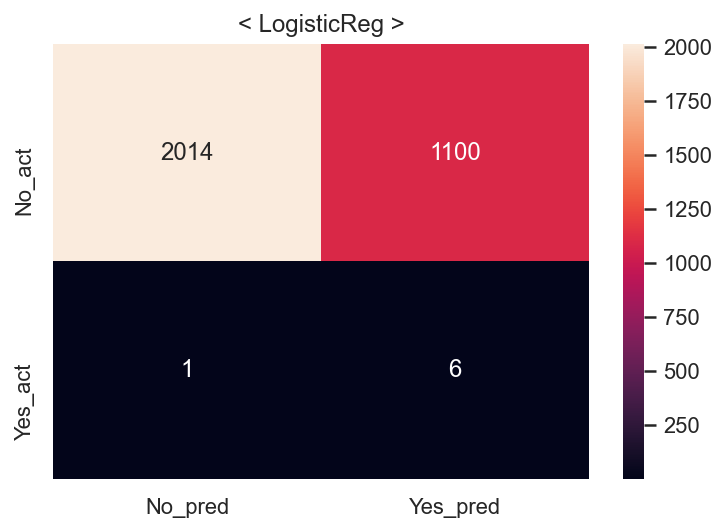

Fitting 5 folds for each of 4 candidates, totalling 20 fits
====Done Evaluation====
====Done Evaluation====


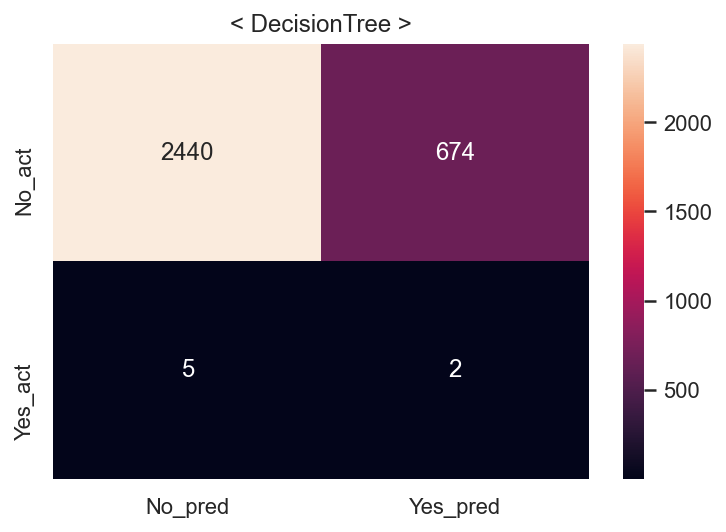

Fitting 5 folds for each of 28 candidates, totalling 140 fits
====Done Evaluation====
====Done Evaluation====


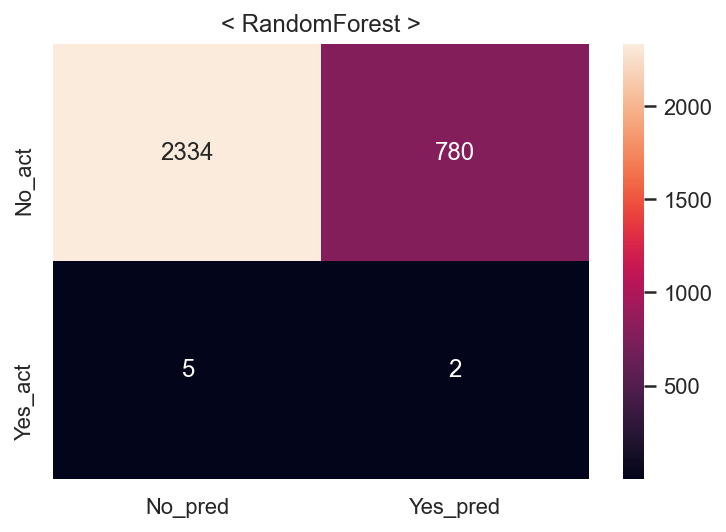

Fitting 5 folds for each of 12 candidates, totalling 60 fits
====Done Evaluation====
====Done Evaluation====


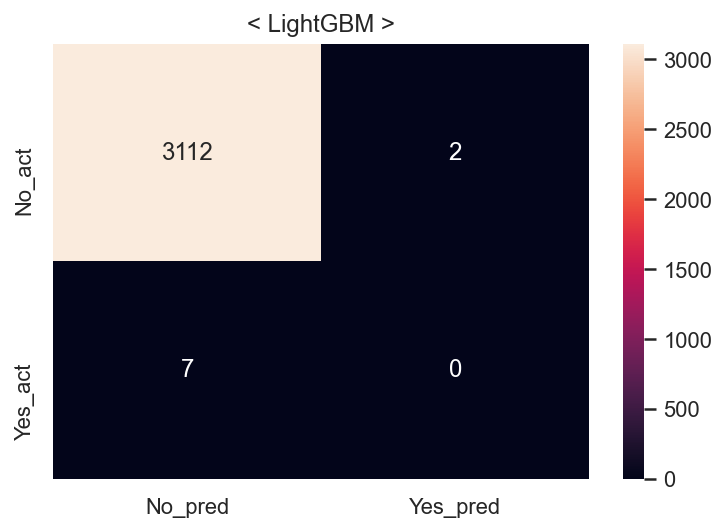

Fitting 5 folds for each of 1 candidates, totalling 5 fits
====Done Evaluation====
====Done Evaluation====


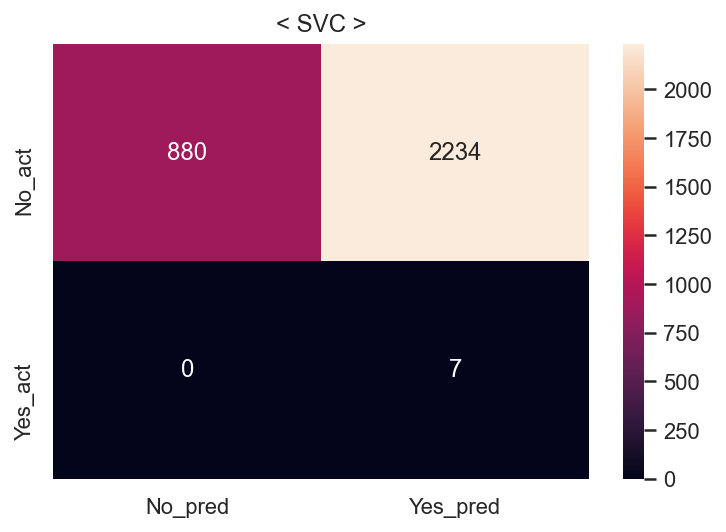

Fit time : 2.97 min


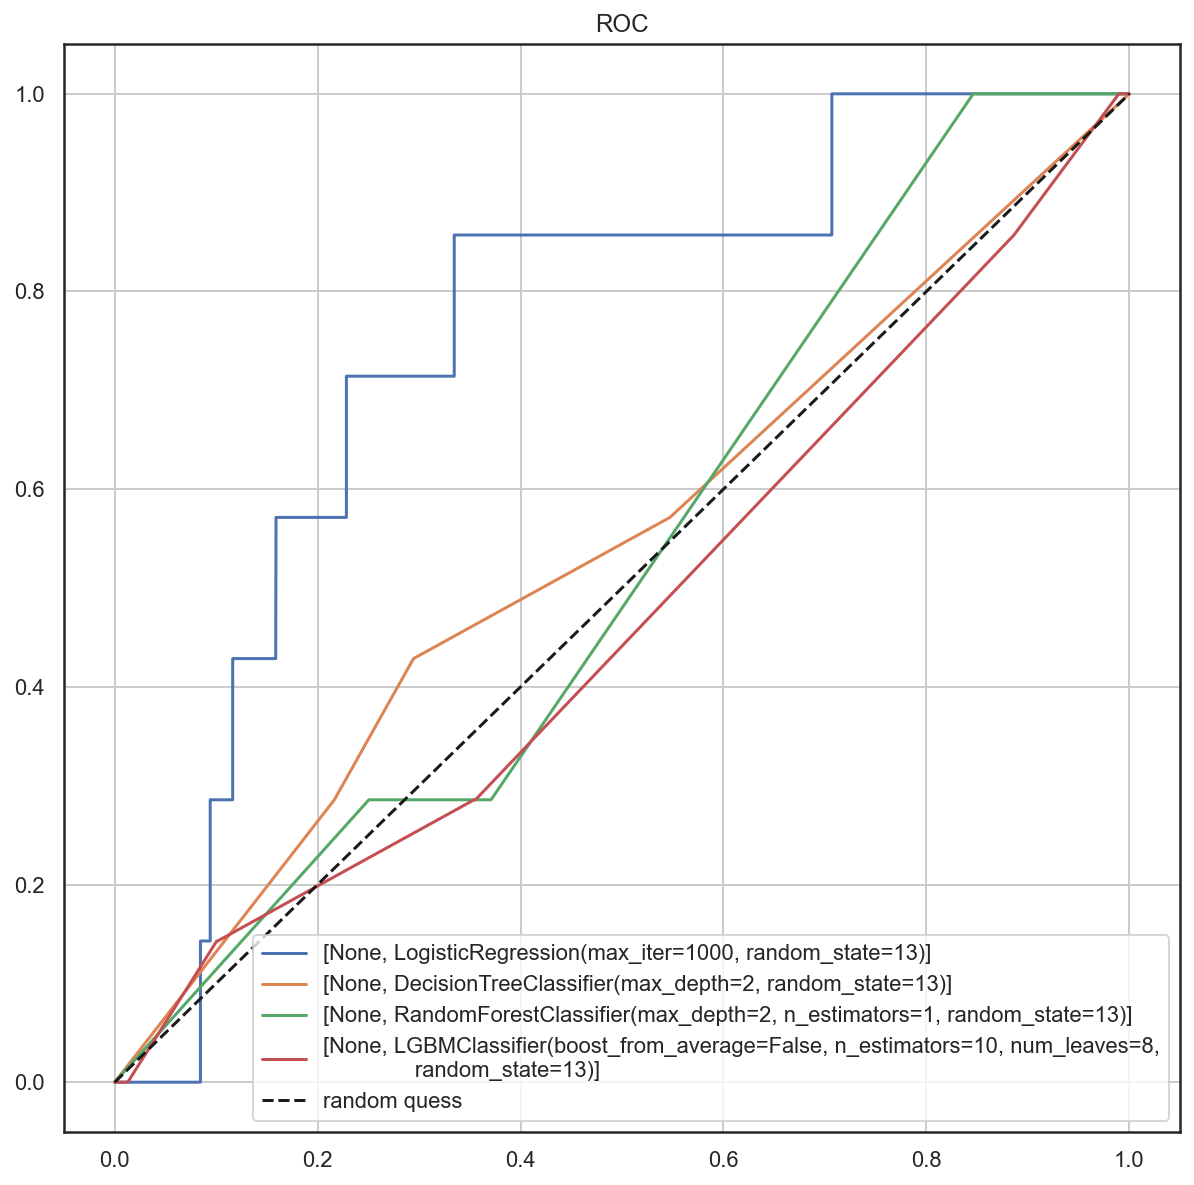

In [57]:
# # null_del
# socar_delete = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# delete안될 때, 인코딩 대상에서 제외해야 할 칼럼 ('repair_cost', 'insure_cost')
# police_site_aid_YN은 0,1밖에 없지만 일단 배정 칼럼값은 0,1,2라 굳이 제외하지 않았음
# 1hot
cat_attribs = socar.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cnt', 'test_set',
                                  'sharing_type', 'has_previous_accident', 'socarpass', 'socarsave', 'car_part1', 'car_part2',
                                 'repair_cost', 'insure_cost'])
socar_df = pd.get_dummies(socar, columns=cat_attribs)
print(len(socar_df))


# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')


_, result_df9 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='No')

In [58]:
result_df9["null_del"] = [0] * len(result_df9)
result_df9["encoded"] = [1]  * len(result_df9)
result_df9["scaler"] = ["None"]  * len(result_df9)
result_df9["sampler"] = ["BdlSMOTE"]  * len(result_df9)
result_df9 = result_df9[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df9

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         0        1   None  BdlSMOTE   LogisticReg        0.827163   
1         0        1   None  BdlSMOTE  DecisionTree        0.942752   
2         0        1   None  BdlSMOTE  RandomForest        0.869572   
3         0        1   None  BdlSMOTE      LightGBM        0.998282   
4         0        1   None  BdlSMOTE           SVC        0.632224   

   train precision  train recall  train f1  train auc  test accuracy  \
0         0.743660      0.998516  0.852447   0.827163       0.647228   
1         0.898664      0.998047  0.945752   0.942752       0.782442   
2         0.793804      0.998516  0.884469   0.869572       0.748478   
3         0.999061      0.997501  0.998280   0.998282       0.997116   
4         0.576254      0.999219  0.730960   0.632224       0.284204   

   test precision  test recall   test f1  test auc  
0        0.005425     0.857143  0.010782  0.751950  
1        0.002959     0.285714  0.005857  0.534636  
2        0.002558     0.285714  0.005070  0.517616  
3        0.000000     0.000000  0.000000  0.499679  
4        0.003124     1.000000  0.006228  0.641297

### (10) null_del = N , encoded = Y , scaler = MM

15959
==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.2s
====Done Evaluation====
====Done Evaluation====


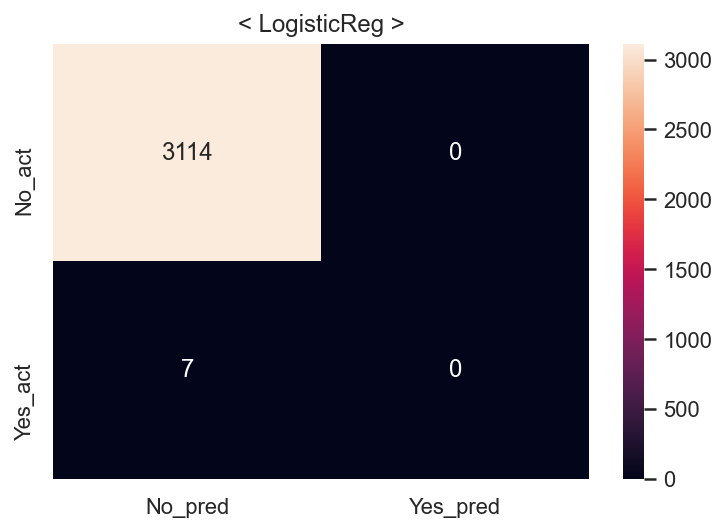

Fitting 5 folds for each of 4 candidates, totalling 20 fits
====Done Evaluation====
====Done Evaluation====


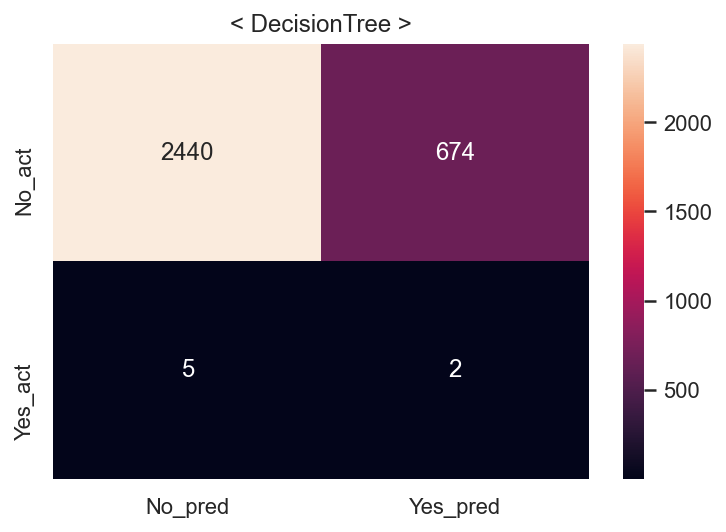

Fitting 5 folds for each of 28 candidates, totalling 140 fits
====Done Evaluation====
====Done Evaluation====


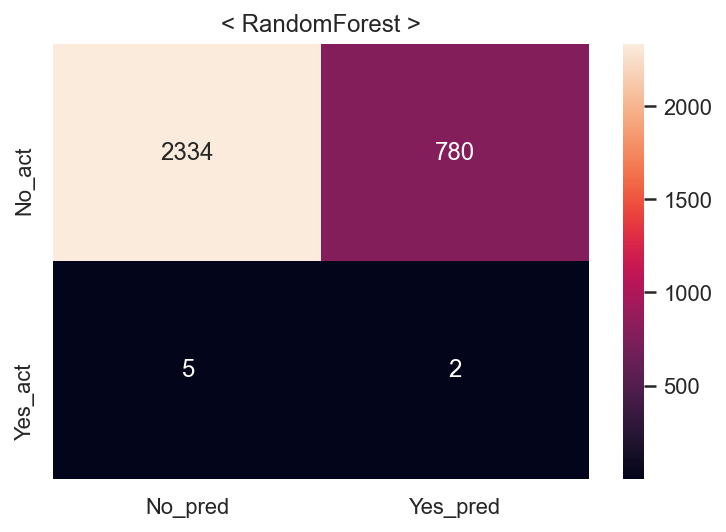

Fitting 5 folds for each of 12 candidates, totalling 60 fits
====Done Evaluation====
====Done Evaluation====


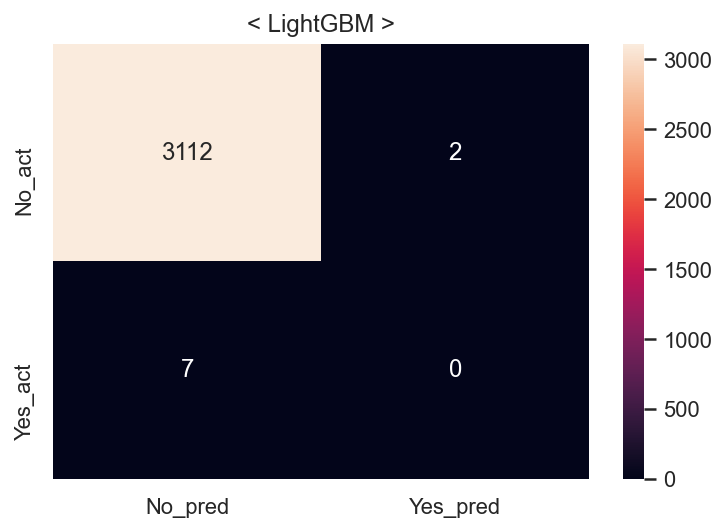

Fitting 5 folds for each of 1 candidates, totalling 5 fits
====Done Evaluation====
====Done Evaluation====


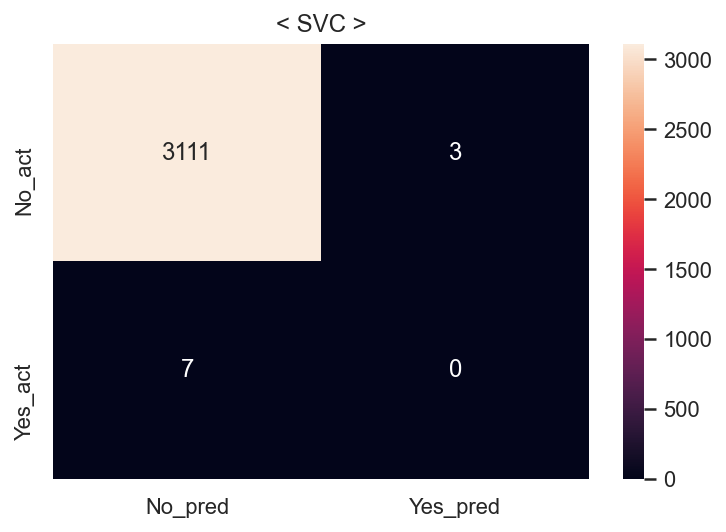

Fit time : 0.24 min


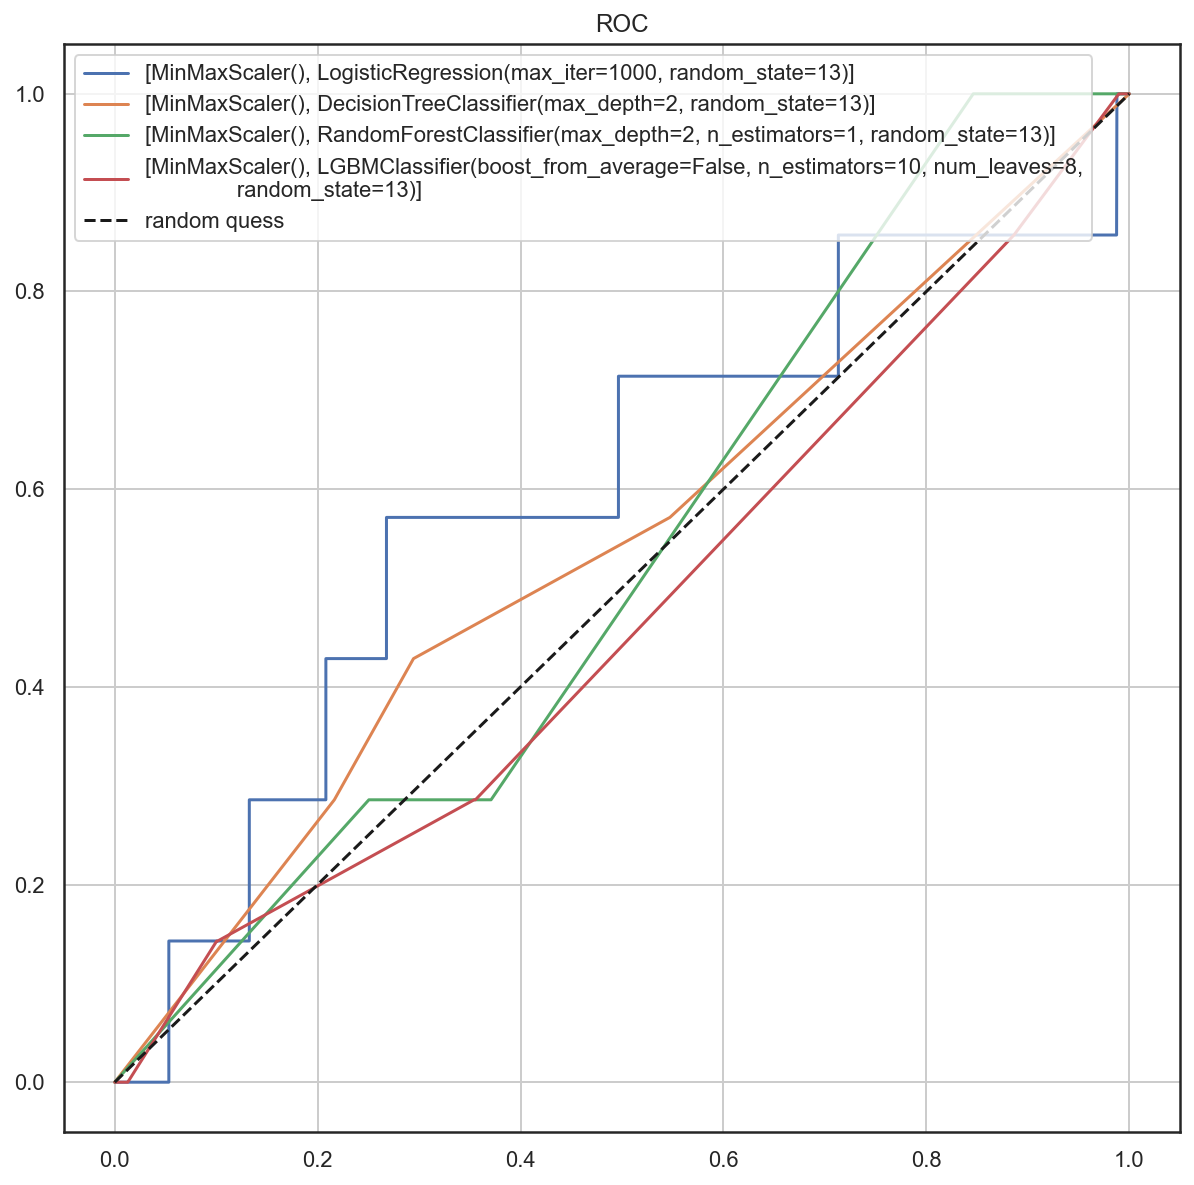

In [59]:
# # null_del
# socar_delete = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# delete안될 때, 인코딩 대상에서 제외해야 할 칼럼 ('repair_cost', 'insure_cost')
# police_site_aid_YN은 0,1밖에 없지만 일단 배정 칼럼값은 0,1,2라 굳이 제외하지 않았음
# 1hot
cat_attribs = socar.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cnt', 'test_set',
                                  'sharing_type', 'has_previous_accident', 'socarpass', 'socarsave', 'car_part1', 'car_part2',
                                 'repair_cost', 'insure_cost'])
socar_df = pd.get_dummies(socar, columns=cat_attribs)
print(len(socar_df))


# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')


_, result_df10 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='MM')

In [60]:
result_df10["null_del"] = [0] * len(result_df10)
result_df10["encoded"] = [1]  * len(result_df10)
result_df10["scaler"] = ["MM"]  * len(result_df10)
result_df10["sampler"] = ["BdlSMOTE"]  * len(result_df10)
result_df10 = result_df10[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df10

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         0        1     MM  BdlSMOTE   LogisticReg        0.998672   
1         0        1     MM  BdlSMOTE  DecisionTree        0.942752   
2         0        1     MM  BdlSMOTE  RandomForest        0.869572   
3         0        1     MM  BdlSMOTE      LightGBM        0.998282   
4         0        1     MM  BdlSMOTE           SVC        0.999961   

   train precision  train recall  train f1  train auc  test accuracy  \
0         1.000000      0.997345  0.998671   0.998672       0.997757   
1         0.898664      0.998047  0.945752   0.942752       0.782442   
2         0.793804      0.998516  0.884469   0.869572       0.748478   
3         0.999061      0.997501  0.998280   0.998282       0.997116   
4         1.000000      0.999922  0.999961   0.999961       0.996796   

   test precision  test recall   test f1  test auc  
0        0.000000     0.000000  0.000000  0.500000  
1        0.002959     0.285714  0.005857  0.534636  
2        0.002558     0.285714  0.005070  0.517616  
3        0.000000     0.000000  0.000000  0.499679  
4        0.000000     0.000000  0.000000  0.499518

### (11) null_del = N , encoded = Y , scaler = SD

15959
==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.2s
====Done Evaluation====
====Done Evaluation====


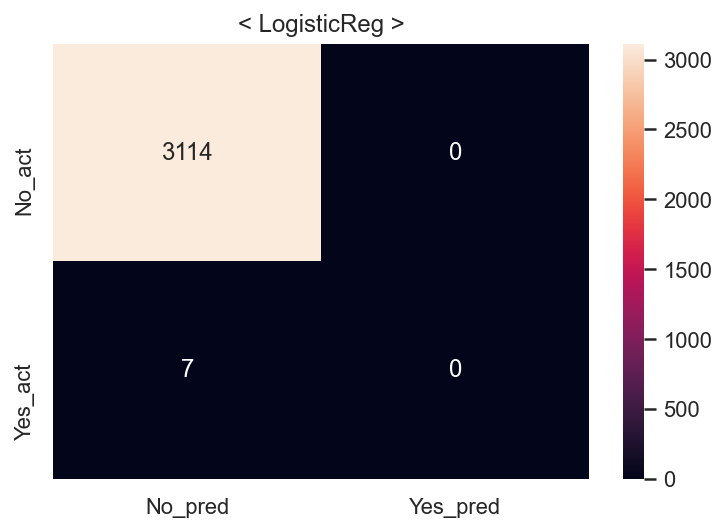

Fitting 5 folds for each of 4 candidates, totalling 20 fits
====Done Evaluation====
====Done Evaluation====


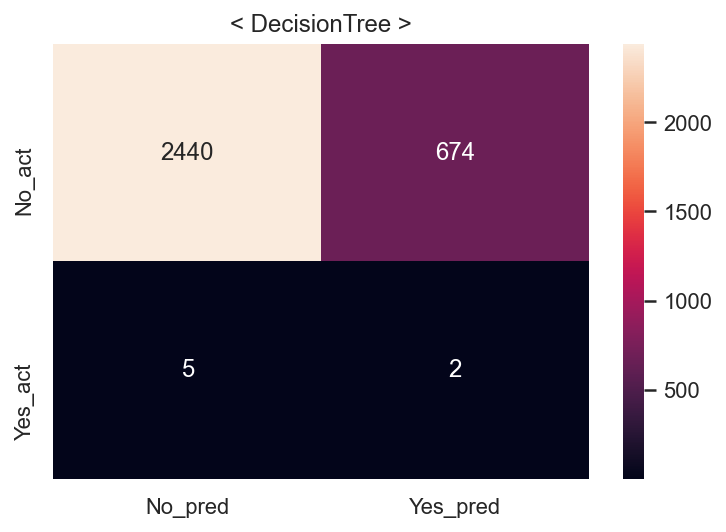

Fitting 5 folds for each of 28 candidates, totalling 140 fits
====Done Evaluation====
====Done Evaluation====


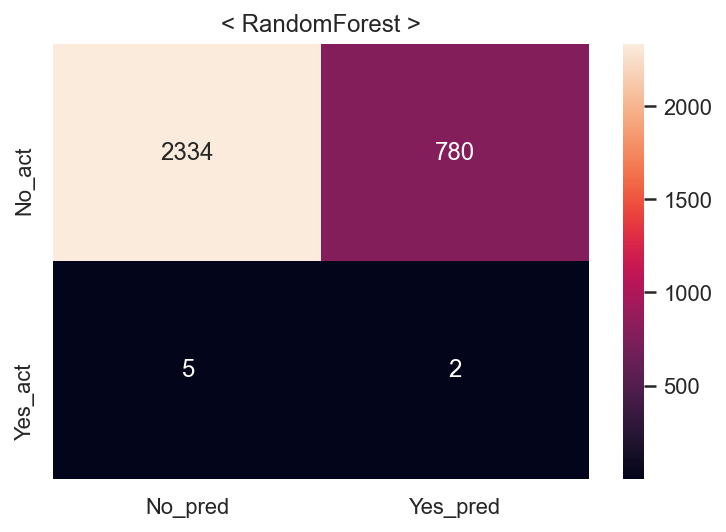

Fitting 5 folds for each of 12 candidates, totalling 60 fits
====Done Evaluation====
====Done Evaluation====


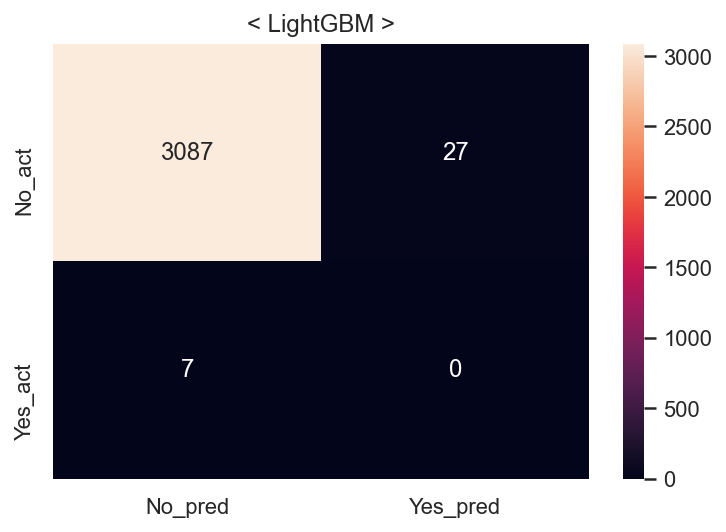

Fitting 5 folds for each of 1 candidates, totalling 5 fits
====Done Evaluation====
====Done Evaluation====


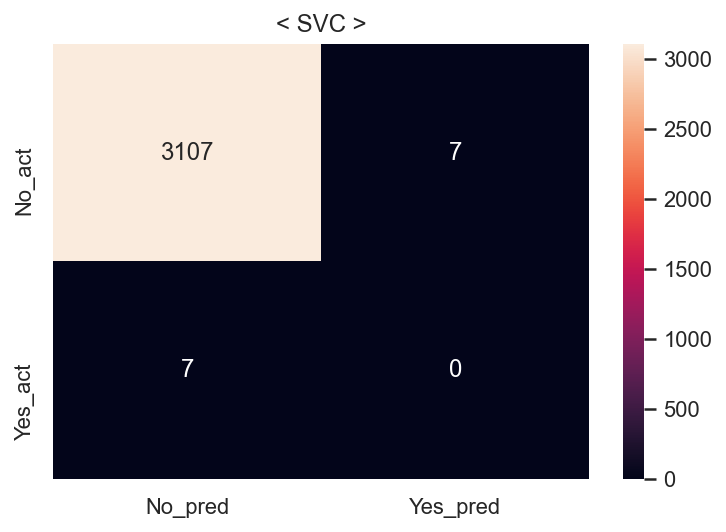

Fit time : 0.48 min


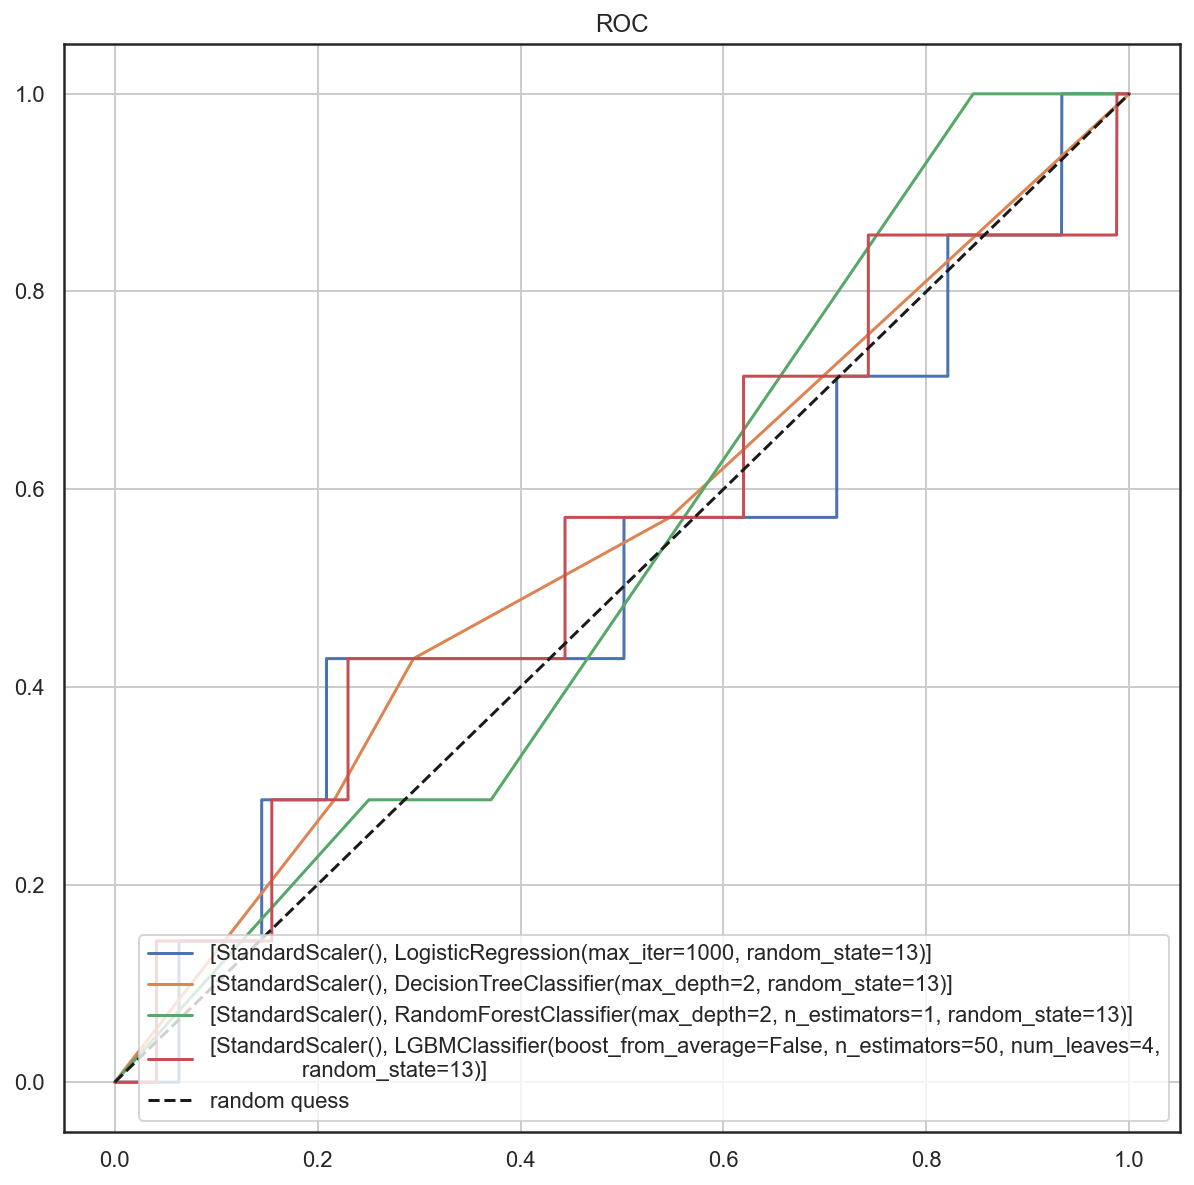

In [64]:
# # null_del
# socar_delete = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# delete안될 때, 인코딩 대상에서 제외해야 할 칼럼 ('repair_cost', 'insure_cost')
# police_site_aid_YN은 0,1밖에 없지만 일단 배정 칼럼값은 0,1,2라 굳이 제외하지 않았음
# 1hot
cat_attribs = socar.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cnt', 'test_set',
                                  'sharing_type', 'has_previous_accident', 'socarpass', 'socarsave', 'car_part1', 'car_part2',
                                 'repair_cost', 'insure_cost'])
socar_df = pd.get_dummies(socar, columns=cat_attribs)
print(len(socar_df))


# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')


_, result_df11 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='SD')

In [65]:
result_df11["null_del"] = [0] * len(result_df11)
result_df11["encoded"] = [1]  * len(result_df11)
result_df11["scaler"] = ["SD"]  * len(result_df11)
result_df11["sampler"] = ["BdlSMOTE"]  * len(result_df11)
result_df11 = result_df11[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df11

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         0        1     SD  BdlSMOTE   LogisticReg        0.998672   
1         0        1     SD  BdlSMOTE  DecisionTree        0.942752   
2         0        1     SD  BdlSMOTE  RandomForest        0.869572   
3         0        1     SD  BdlSMOTE      LightGBM        0.996642   
4         0        1     SD  BdlSMOTE           SVC        0.999922   

   train precision  train recall  train f1  train auc  test accuracy  \
0         1.000000      0.997345  0.998671   0.998672       0.997757   
1         0.898664      0.998047  0.945752   0.942752       0.782442   
2         0.793804      0.998516  0.884469   0.869572       0.748478   
3         0.995790      0.997501  0.996645   0.996642       0.989106   
4         1.000000      0.999844  0.999922   0.999922       0.995514   

   test precision  test recall   test f1  test auc  
0        0.000000     0.000000  0.000000  0.500000  
1        0.002959     0.285714  0.005857  0.534636  
2        0.002558     0.285714  0.005070  0.517616  
3        0.000000     0.000000  0.000000  0.495665  
4        0.000000     0.000000  0.000000  0.498876

### (12) null_del = N , encoded = Y , scaler = RB

15959
==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.6s
====Done Evaluation====
====Done Evaluation====


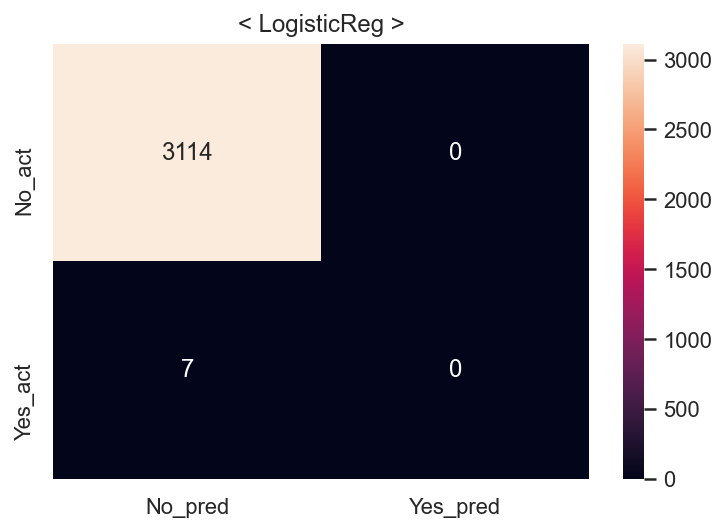

Fitting 5 folds for each of 4 candidates, totalling 20 fits
====Done Evaluation====
====Done Evaluation====


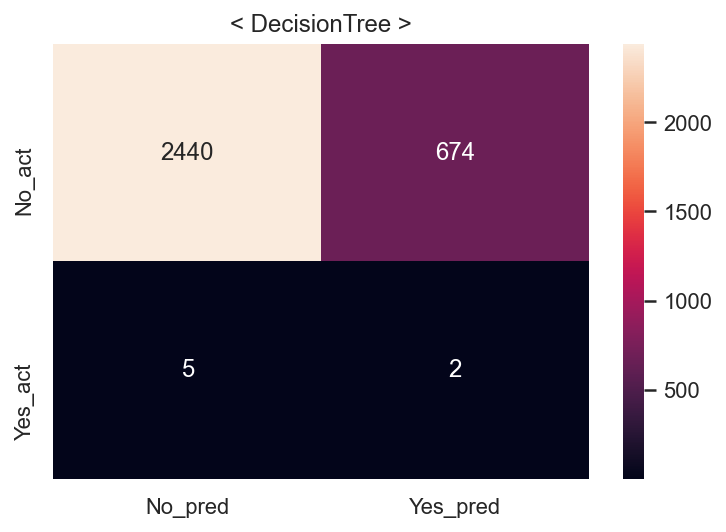

Fitting 5 folds for each of 28 candidates, totalling 140 fits
====Done Evaluation====
====Done Evaluation====


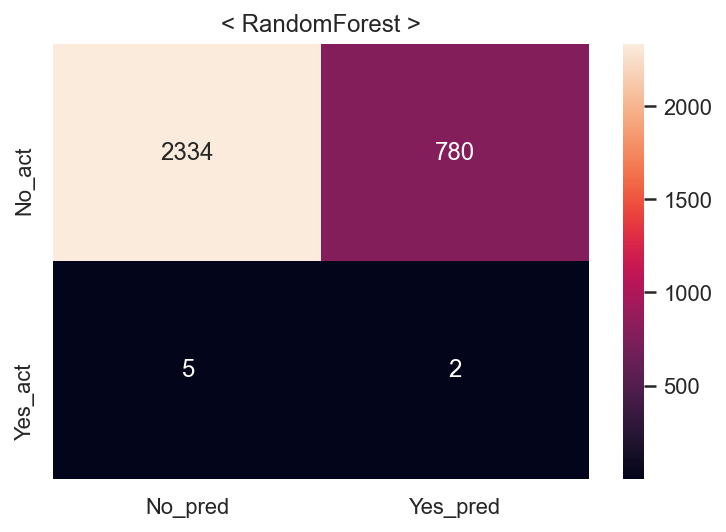

Fitting 5 folds for each of 12 candidates, totalling 60 fits
====Done Evaluation====
====Done Evaluation====


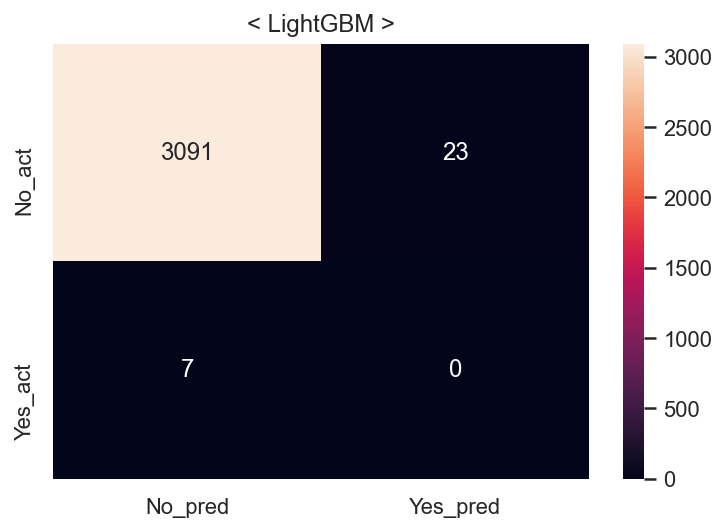

Fitting 5 folds for each of 1 candidates, totalling 5 fits
====Done Evaluation====
====Done Evaluation====


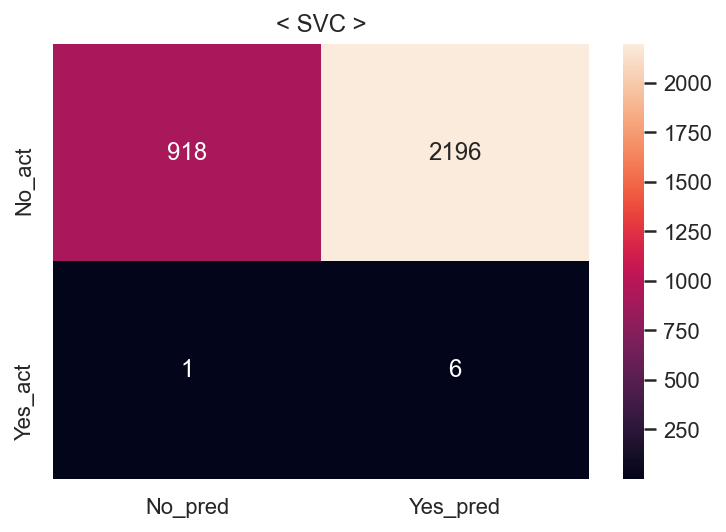

Fit time : 2.73 min


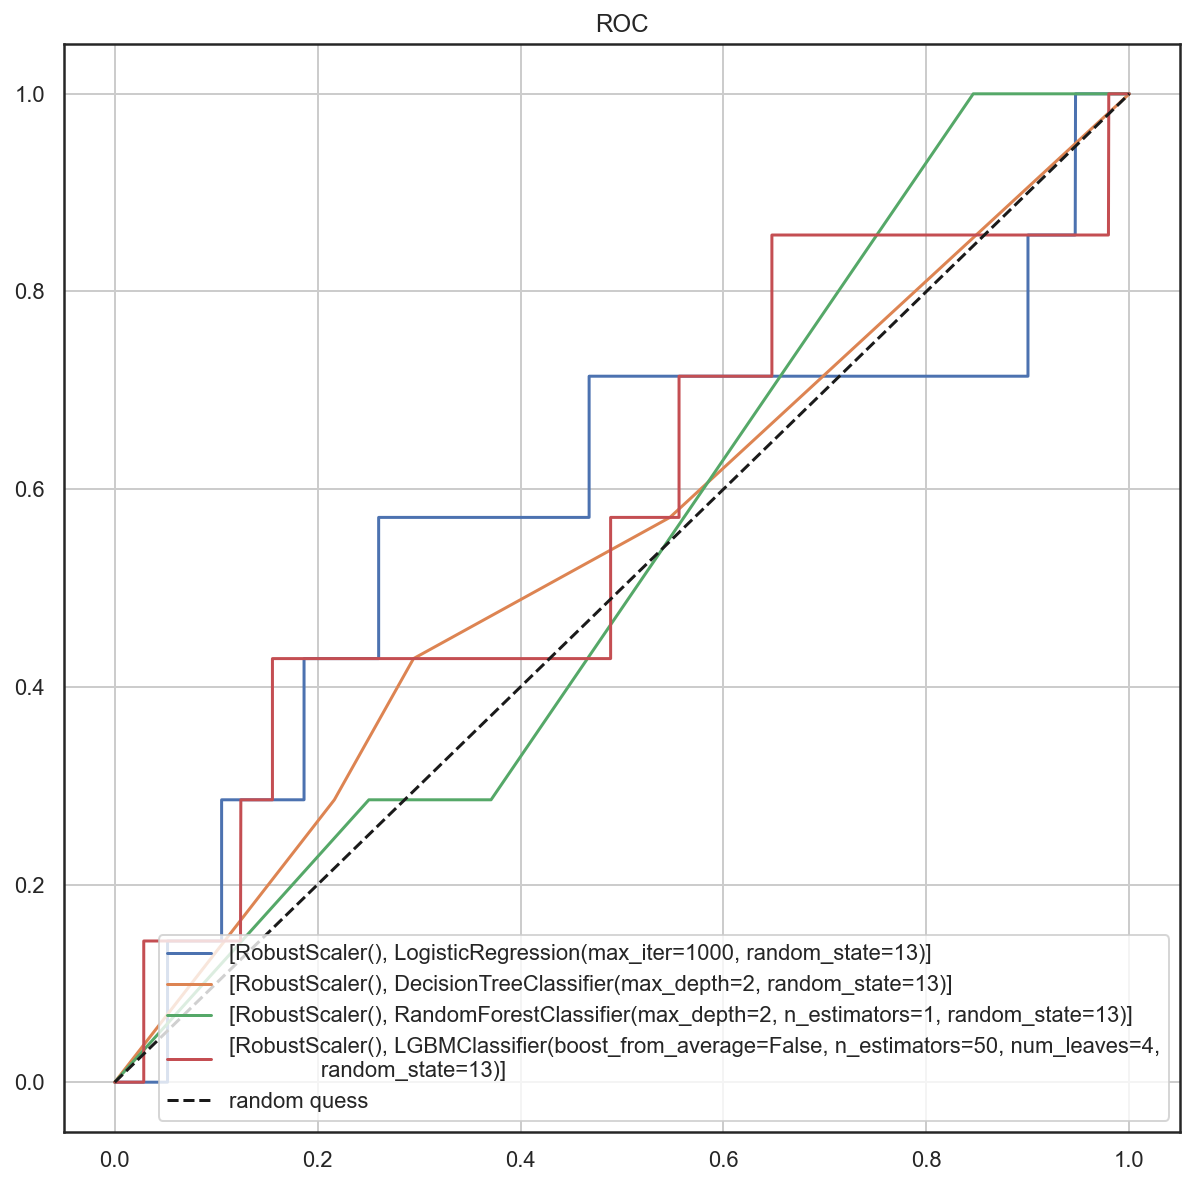

In [66]:
# # null_del
# socar_delete = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# delete안될 때, 인코딩 대상에서 제외해야 할 칼럼 ('repair_cost', 'insure_cost')
# police_site_aid_YN은 0,1밖에 없지만 일단 배정 칼럼값은 0,1,2라 굳이 제외하지 않았음
# 1hot
cat_attribs = socar.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cnt', 'test_set',
                                  'sharing_type', 'has_previous_accident', 'socarpass', 'socarsave', 'car_part1', 'car_part2',
                                 'repair_cost', 'insure_cost'])
socar_df = pd.get_dummies(socar, columns=cat_attribs)
print(len(socar_df))


# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')


_, result_df12 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='RB')

In [67]:
result_df12["null_del"] = [0] * len(result_df12)
result_df12["encoded"] = [1]  * len(result_df12)
result_df12["scaler"] = ["RB"]  * len(result_df12)
result_df12["sampler"] = ["BdlSMOTE"]  * len(result_df12)
result_df12 = result_df12[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df12

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         0        1     RB  BdlSMOTE   LogisticReg        0.998672   
1         0        1     RB  BdlSMOTE  DecisionTree        0.942752   
2         0        1     RB  BdlSMOTE  RandomForest        0.869572   
3         0        1     RB  BdlSMOTE      LightGBM        0.996954   
4         0        1     RB  BdlSMOTE           SVC        0.643822   

   train precision  train recall  train f1  train auc  test accuracy  \
0         1.000000      0.997345  0.998671   0.998672       0.997757   
1         0.898664      0.998047  0.945752   0.942752       0.782442   
2         0.793804      0.998516  0.884469   0.869572       0.748478   
3         0.996489      0.997423  0.996956   0.996954       0.990388   
4         0.584037      0.999531  0.737276   0.643822       0.296059   

   test precision  test recall   test f1  test auc  
0        0.000000     0.000000  0.000000  0.500000  
1        0.002959     0.285714  0.005857  0.534636  
2        0.002558     0.285714  0.005070  0.517616  
3        0.000000     0.000000  0.000000  0.496307  
4        0.002725     0.857143  0.005432  0.575970

### (13) null_del = N , encoded = N , scaler = No

==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


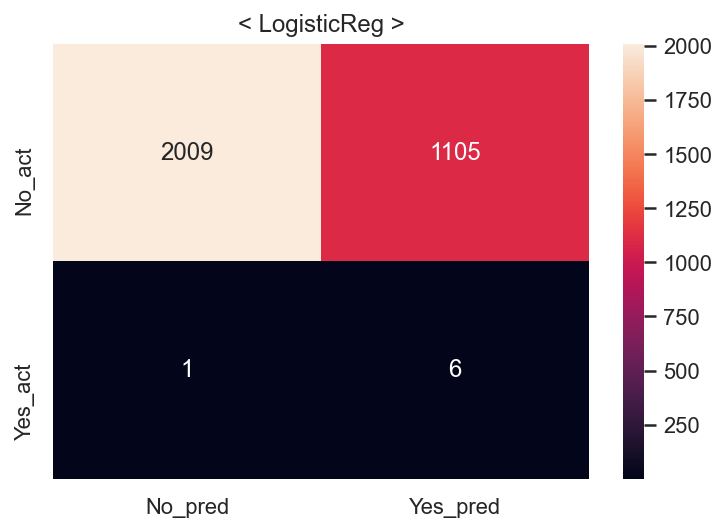

Fitting 5 folds for each of 4 candidates, totalling 20 fits
====Done Evaluation====
====Done Evaluation====


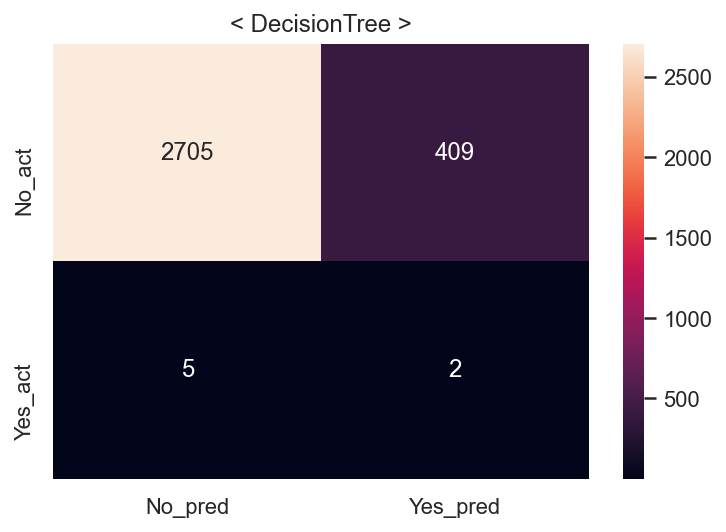

Fitting 5 folds for each of 28 candidates, totalling 140 fits
====Done Evaluation====
====Done Evaluation====


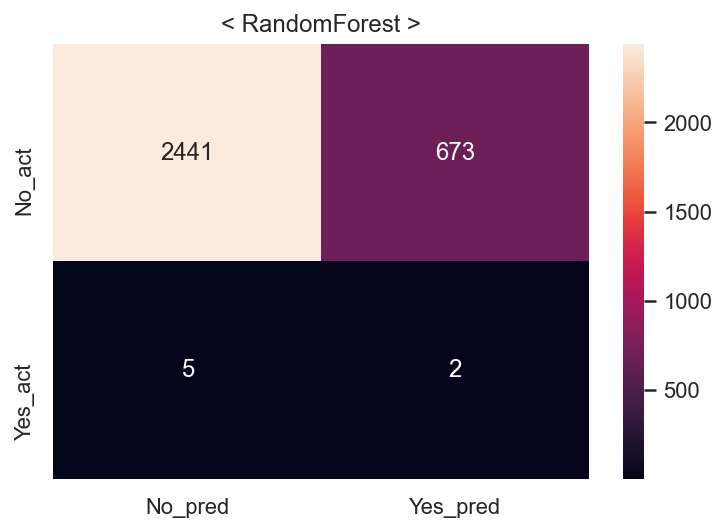

Fitting 5 folds for each of 12 candidates, totalling 60 fits
====Done Evaluation====
====Done Evaluation====


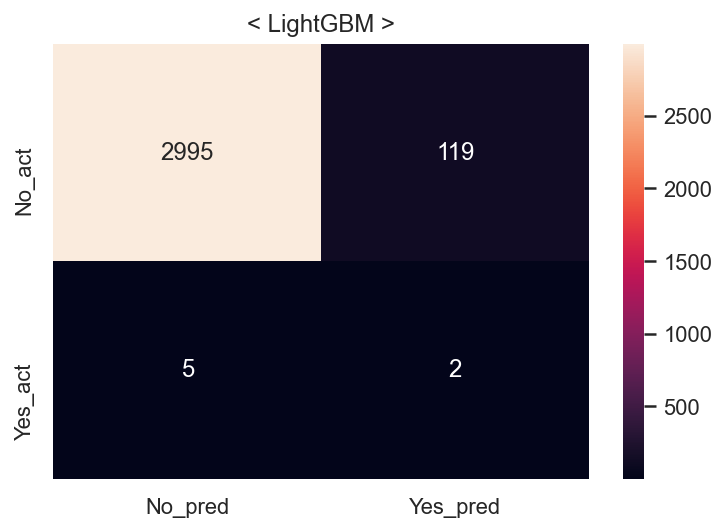

Fitting 5 folds for each of 1 candidates, totalling 5 fits
====Done Evaluation====
====Done Evaluation====


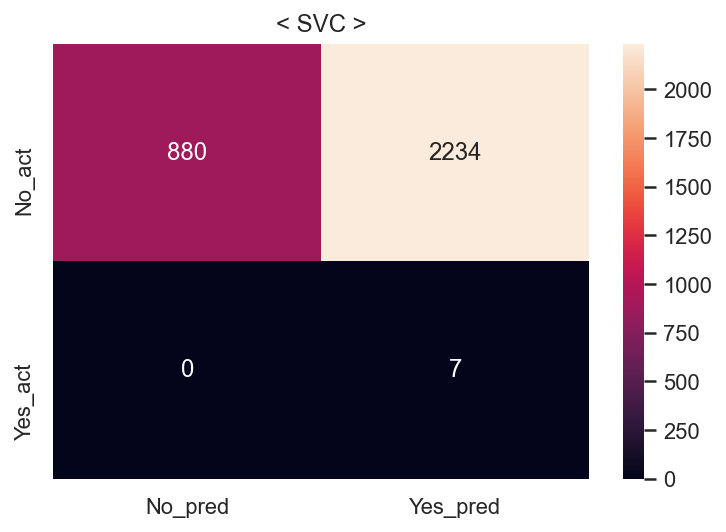

Fit time : 2.13 min


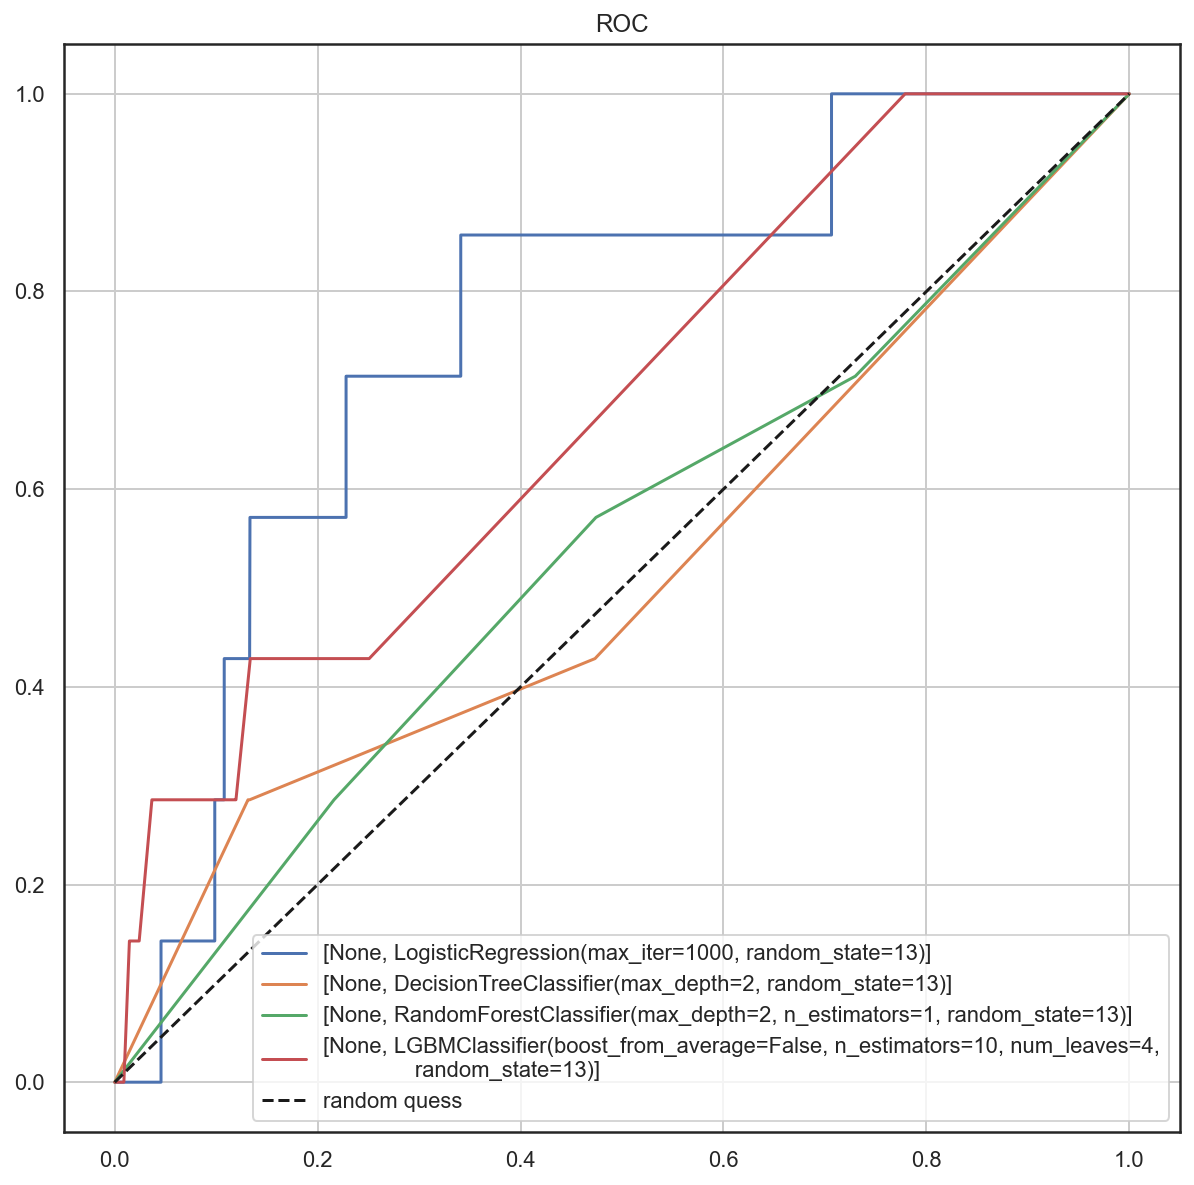

In [68]:
# # null_del
# socar_delete = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# delete안될 때, 인코딩 대상에서 제외해야 할 칼럼 ('repair_cost', 'insure_cost')
# police_site_aid_YN은 0,1밖에 없지만 일단 배정 칼럼값은 0,1,2라 굳이 제외하지 않았음
# 1hot
# cat_attribs = socar.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cnt', 'test_set',
#                                   'sharing_type', 'has_previous_accident', 'socarpass', 'socarsave', 'car_part1', 'car_part2',
#                                  'repair_cost', 'insure_cost'])
# socar_df = pd.get_dummies(socar, columns=cat_attribs)
# print(len(socar_df))


# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')


_, result_df13 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='No')

In [69]:
result_df13["null_del"] = [0] * len(result_df13)
result_df13["encoded"] = [0]  * len(result_df13)
result_df13["scaler"] = ["None"]  * len(result_df13)
result_df13["sampler"] = ["BdlSMOTE"]  * len(result_df13)
result_df13 = result_df13[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df13

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         0        0   None  BdlSMOTE   LogisticReg        0.823961   
1         0        0   None  BdlSMOTE  DecisionTree        0.955990   
2         0        0   None  BdlSMOTE  RandomForest        0.942635   
3         0        0   None  BdlSMOTE      LightGBM        0.987777   
4         0        0   None  BdlSMOTE           SVC        0.632381   

   train precision  train recall  train f1  train auc  test accuracy  \
0         0.740130      0.998516  0.850123   0.823961       0.645626   
1         0.920672      0.997969  0.957763   0.955990       0.867350   
2         0.898474      0.998047  0.945647   0.942635       0.782762   
3         0.978179      0.997813  0.987899   0.987777       0.960269   
4         0.576358      0.999219  0.731044   0.632381       0.284204   

   test precision  test recall   test f1  test auc  
0        0.005401     0.857143  0.010733  0.751147  
1        0.004866     0.285714  0.009569  0.577186  
2        0.002963     0.285714  0.005865  0.534797  
3        0.016529     0.285714  0.031250  0.623750  
4        0.003124     1.000000  0.006228  0.641297

### (14) null_del = N , encoded = N , scaler = MM

==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


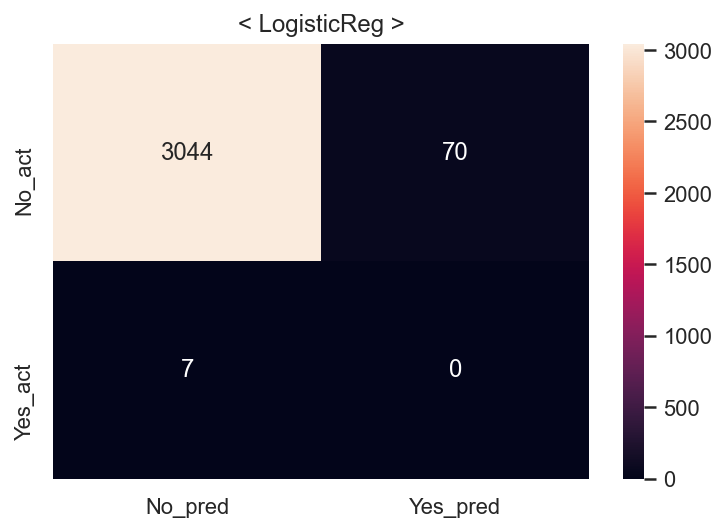

Fitting 5 folds for each of 4 candidates, totalling 20 fits
====Done Evaluation====
====Done Evaluation====


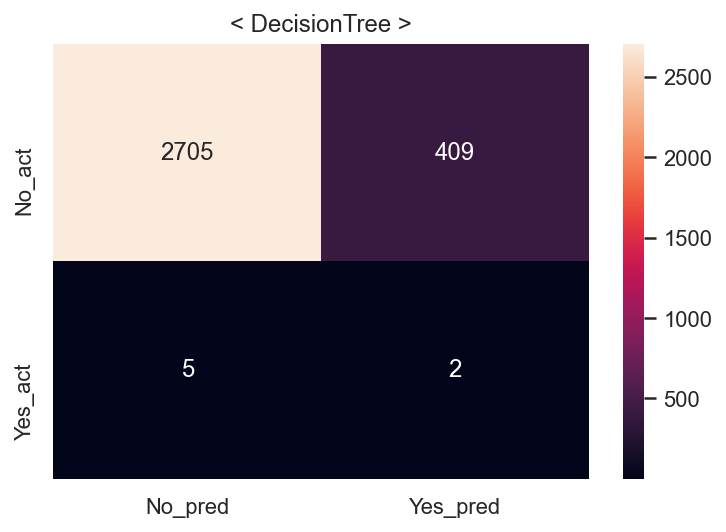

Fitting 5 folds for each of 28 candidates, totalling 140 fits
====Done Evaluation====
====Done Evaluation====


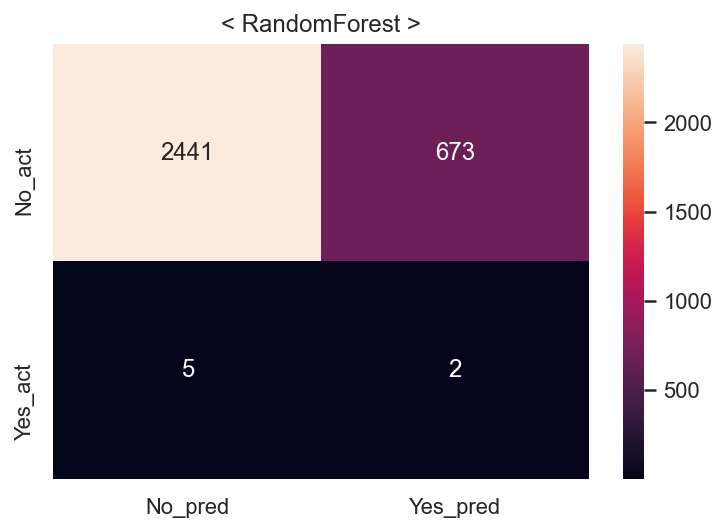

Fitting 5 folds for each of 12 candidates, totalling 60 fits
====Done Evaluation====
====Done Evaluation====


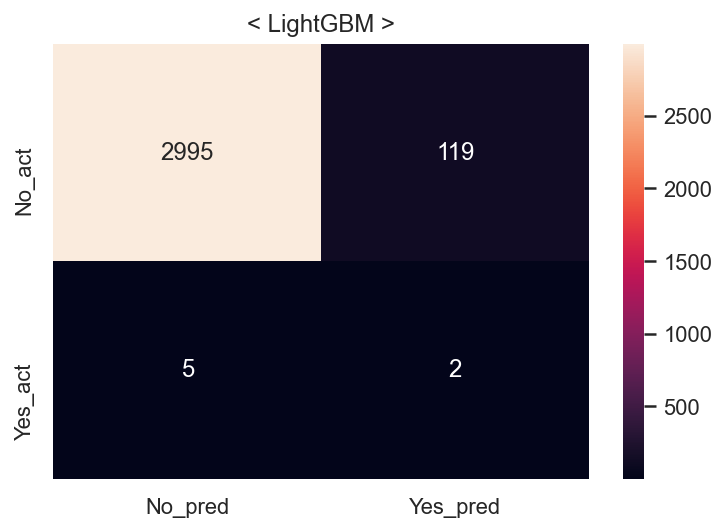

Fitting 5 folds for each of 1 candidates, totalling 5 fits
====Done Evaluation====
====Done Evaluation====


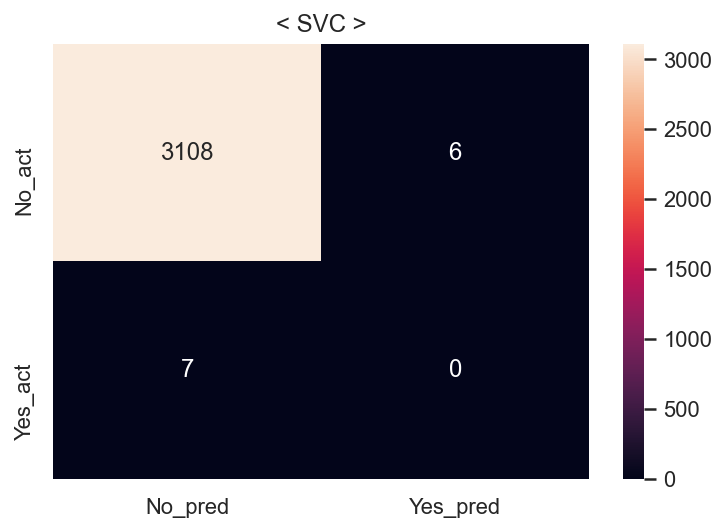

Fit time : 0.21 min


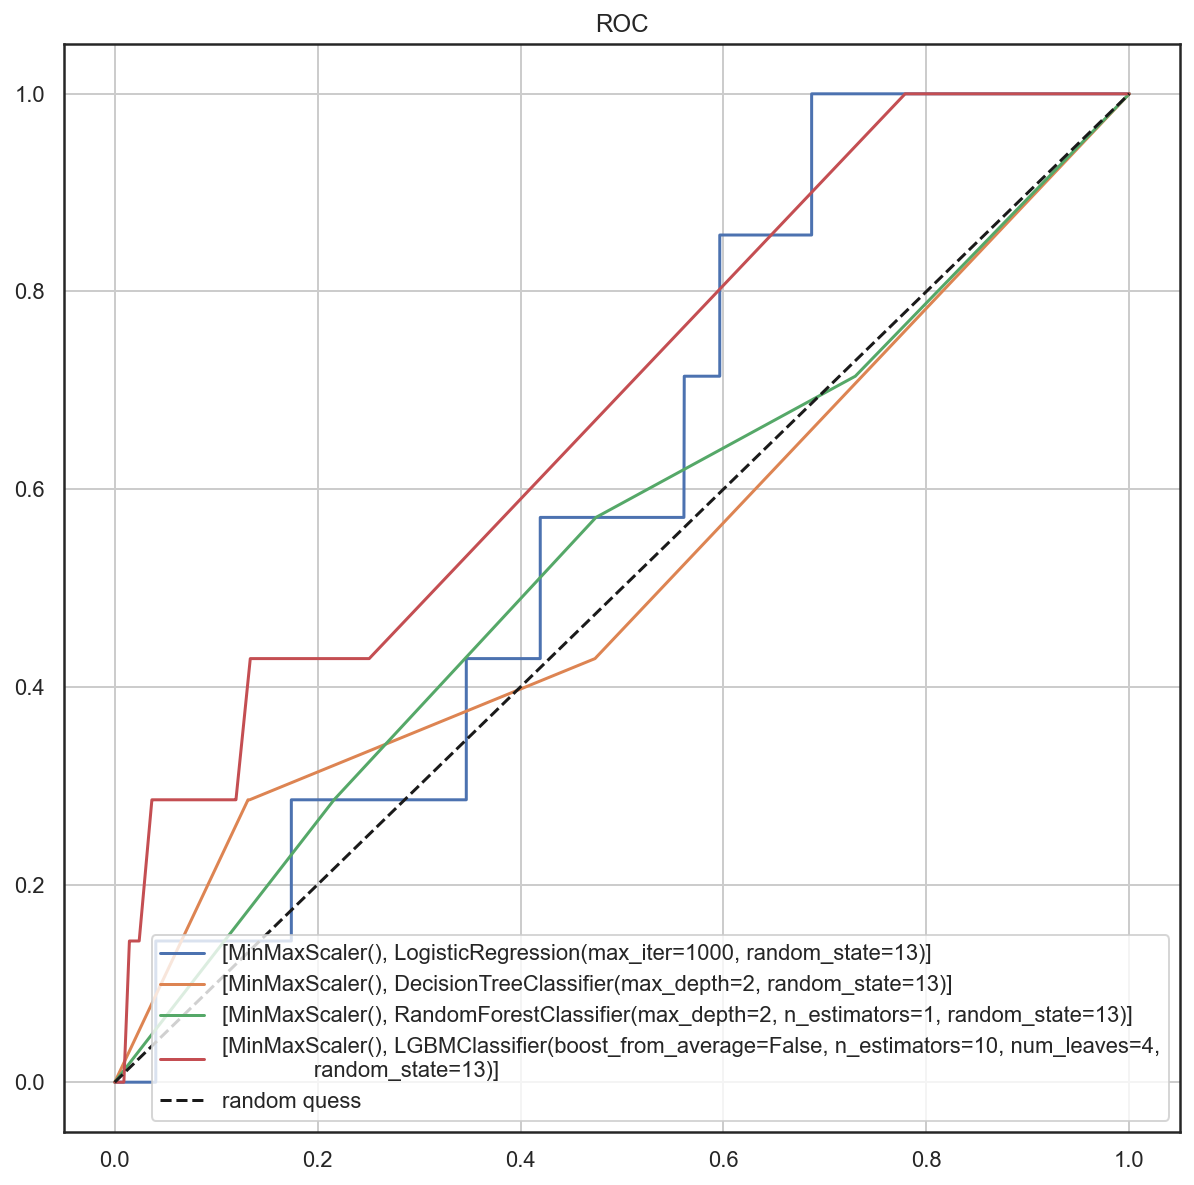

In [71]:
# # null_del
# socar_delete = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# delete안될 때, 인코딩 대상에서 제외해야 할 칼럼 ('repair_cost', 'insure_cost')
# police_site_aid_YN은 0,1밖에 없지만 일단 배정 칼럼값은 0,1,2라 굳이 제외하지 않았음
# 1hot
# cat_attribs = socar.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cnt', 'test_set',
#                                   'sharing_type', 'has_previous_accident', 'socarpass', 'socarsave', 'car_part1', 'car_part2',
#                                  'repair_cost', 'insure_cost'])
# socar_df = pd.get_dummies(socar, columns=cat_attribs)
# print(len(socar_df))


# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')


_, result_df14 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='MM')

In [72]:
result_df14["null_del"] = [0] * len(result_df14)
result_df14["encoded"] = [0]  * len(result_df14)
result_df14["scaler"] = ["MM"]  * len(result_df14)
result_df14["sampler"] = ["BdlSMOTE"]  * len(result_df14)
result_df14 = result_df14[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df14

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         0        0     MM  BdlSMOTE   LogisticReg        0.990198   
1         0        0     MM  BdlSMOTE  DecisionTree        0.955990   
2         0        0     MM  BdlSMOTE  RandomForest        0.942635   
3         0        0     MM  BdlSMOTE      LightGBM        0.987777   
4         0        0     MM  BdlSMOTE           SVC        0.998868   

   train precision  train recall  train f1  train auc  test accuracy  \
0         0.983217      0.997423  0.990269   0.990198       0.975328   
1         0.920672      0.997969  0.957763   0.955990       0.867350   
2         0.898474      0.998047  0.945647   0.942635       0.782762   
3         0.978179      0.997813  0.987899   0.987777       0.960269   
4         0.999609      0.998126  0.998867   0.998868       0.995835   

   test precision  test recall   test f1  test auc  
0        0.000000     0.000000  0.000000  0.488760  
1        0.004866     0.285714  0.009569  0.577186  
2        0.002963     0.285714  0.005865  0.534797  
3        0.016529     0.285714  0.031250  0.623750  
4        0.000000     0.000000  0.000000  0.499037

### (15) null_del = N , encoded = N , scaler = SD

==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s
====Done Evaluation====
====Done Evaluation====


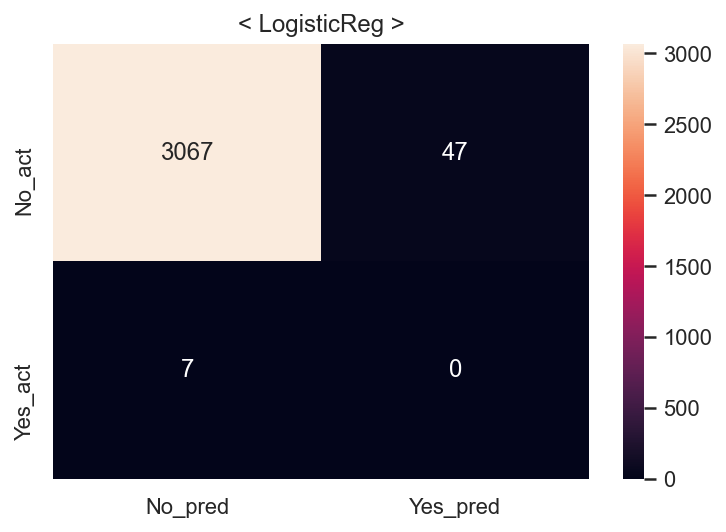

Fitting 5 folds for each of 4 candidates, totalling 20 fits
====Done Evaluation====
====Done Evaluation====


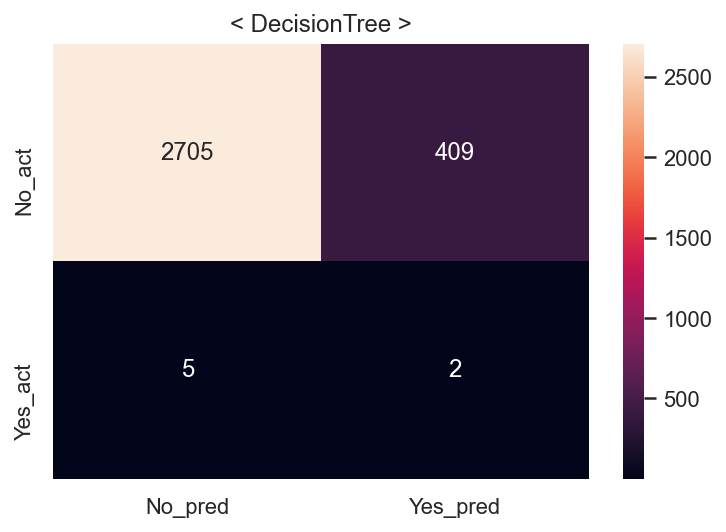

Fitting 5 folds for each of 28 candidates, totalling 140 fits
====Done Evaluation====
====Done Evaluation====


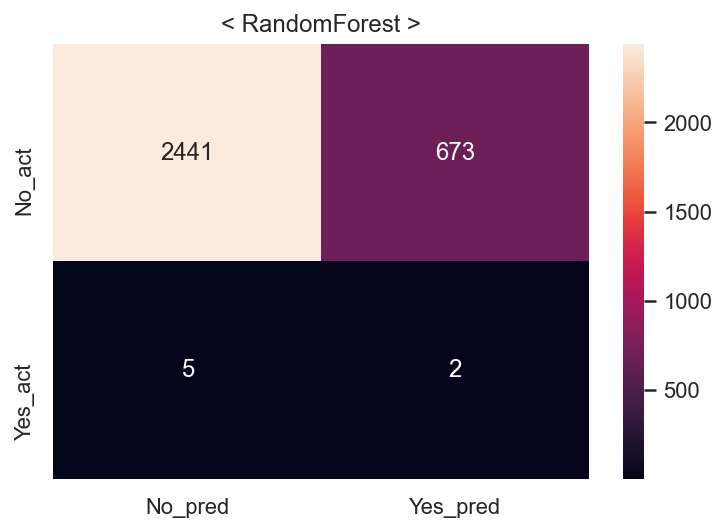

Fitting 5 folds for each of 12 candidates, totalling 60 fits
====Done Evaluation====
====Done Evaluation====


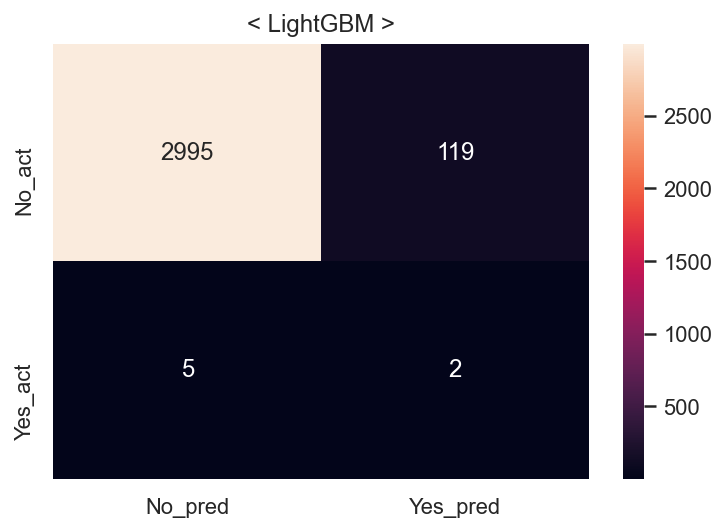

Fitting 5 folds for each of 1 candidates, totalling 5 fits
====Done Evaluation====
====Done Evaluation====


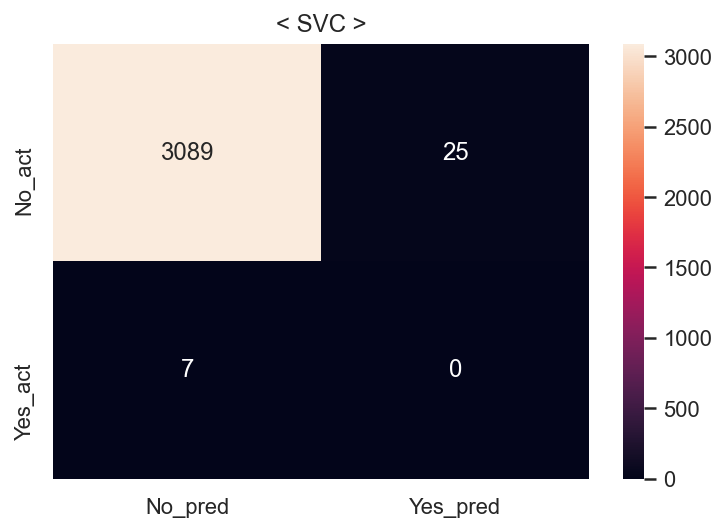

Fit time : 0.26 min


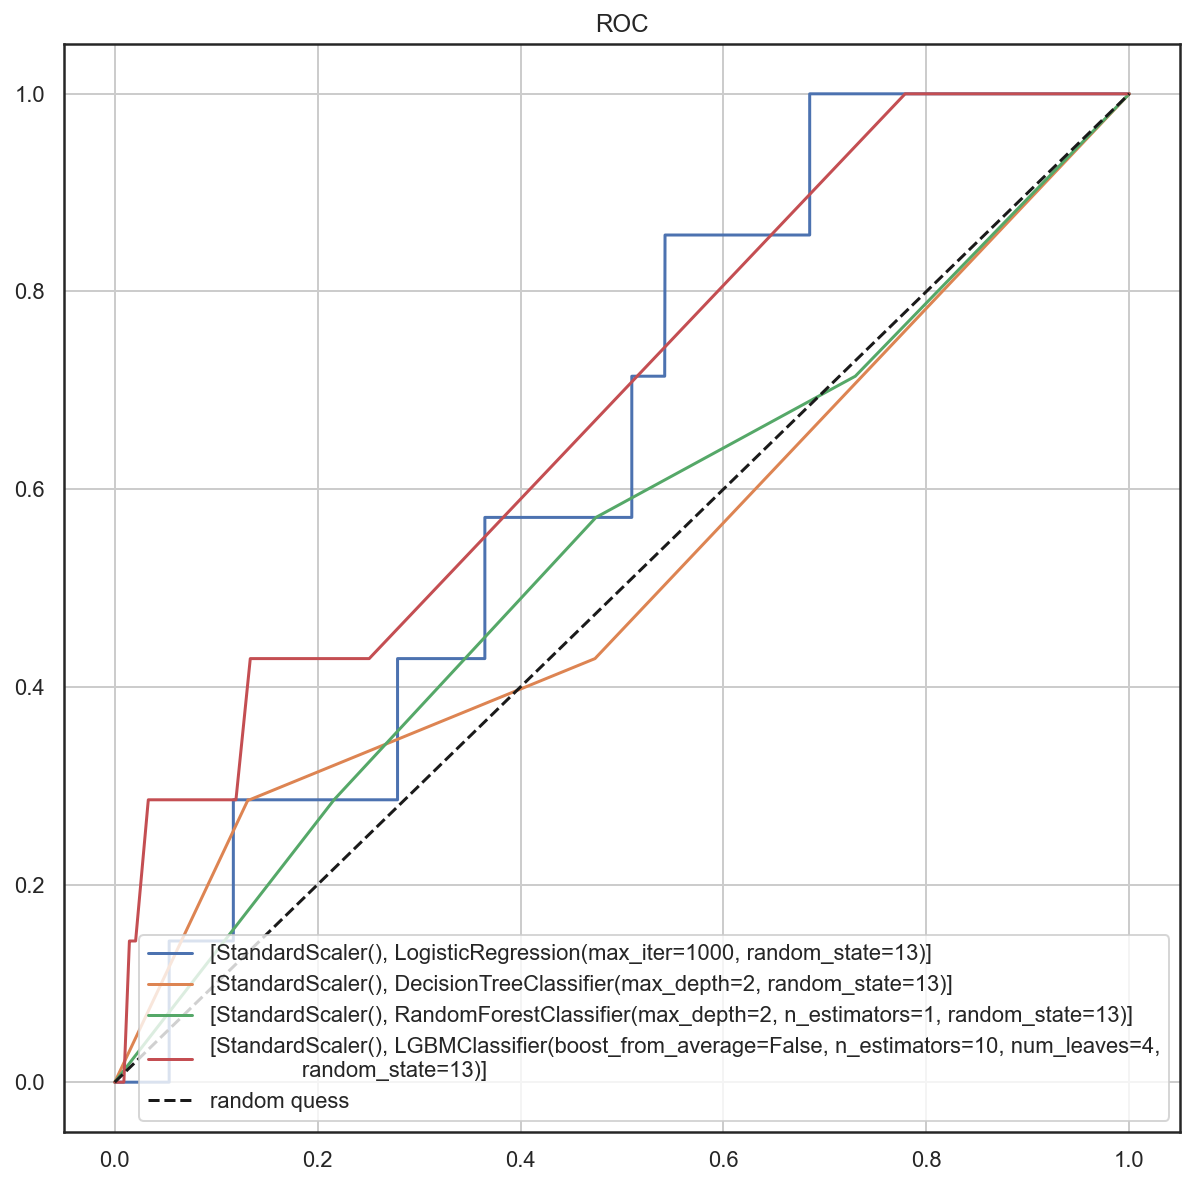

In [73]:
# # null_del
# socar_delete = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# delete안될 때, 인코딩 대상에서 제외해야 할 칼럼 ('repair_cost', 'insure_cost')
# police_site_aid_YN은 0,1밖에 없지만 일단 배정 칼럼값은 0,1,2라 굳이 제외하지 않았음
# 1hot
# cat_attribs = socar.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cnt', 'test_set',
#                                   'sharing_type', 'has_previous_accident', 'socarpass', 'socarsave', 'car_part1', 'car_part2',
#                                  'repair_cost', 'insure_cost'])
# socar_df = pd.get_dummies(socar, columns=cat_attribs)
# print(len(socar_df))


# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')


_, result_df15 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='SD')

In [74]:
result_df15["null_del"] = [0] * len(result_df15)
result_df15["encoded"] = [0]  * len(result_df15)
result_df15["scaler"] = ["SD"]  * len(result_df15)
result_df15["sampler"] = ["BdlSMOTE"]  * len(result_df15)
result_df15 = result_df15[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df15

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         0        0     SD  BdlSMOTE   LogisticReg        0.992971   
1         0        0     SD  BdlSMOTE  DecisionTree        0.955990   
2         0        0     SD  BdlSMOTE  RandomForest        0.942635   
3         0        0     SD  BdlSMOTE      LightGBM        0.987777   
4         0        0     SD  BdlSMOTE           SVC        0.999219   

   train precision  train recall  train f1  train auc  test accuracy  \
0         0.988621      0.997423  0.993002   0.992971       0.982698   
1         0.920672      0.997969  0.957763   0.955990       0.867350   
2         0.898474      0.998047  0.945647   0.942635       0.782762   
3         0.978179      0.997813  0.987899   0.987777       0.960269   
4         0.999609      0.998828  0.999219   0.999219       0.989747   

   test precision  test recall   test f1  test auc  
0        0.000000     0.000000  0.000000  0.492453  
1        0.004866     0.285714  0.009569  0.577186  
2        0.002963     0.285714  0.005865  0.534797  
3        0.016529     0.285714  0.031250  0.623750  
4        0.000000     0.000000  0.000000  0.495986

### (16) null_del = N , encoded = N , scaler = RB

==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]
==Sampling Result==
y_train :  [[0, 1], [12804, 34]]
y_train_over : [[0, 1], [12804, 12804]]
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.2s
====Done Evaluation====
====Done Evaluation====


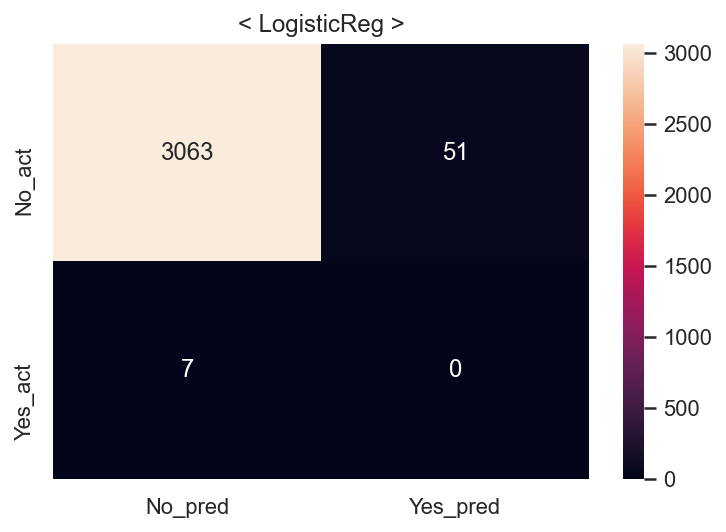

Fitting 5 folds for each of 4 candidates, totalling 20 fits
====Done Evaluation====
====Done Evaluation====


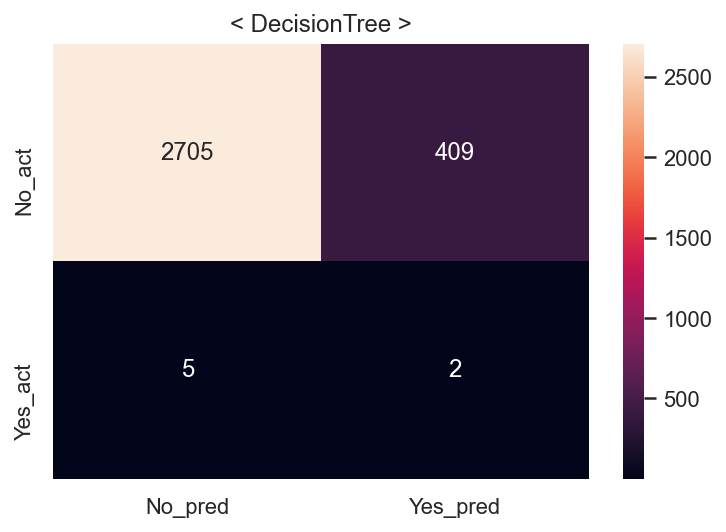

Fitting 5 folds for each of 28 candidates, totalling 140 fits
====Done Evaluation====
====Done Evaluation====


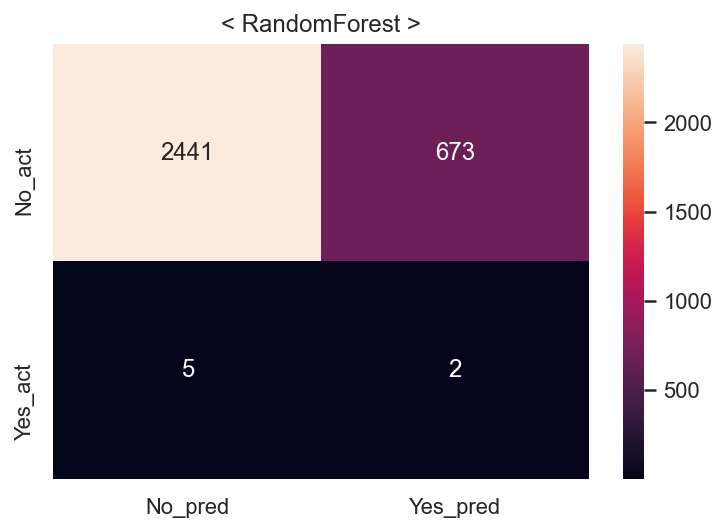

Fitting 5 folds for each of 12 candidates, totalling 60 fits
====Done Evaluation====
====Done Evaluation====


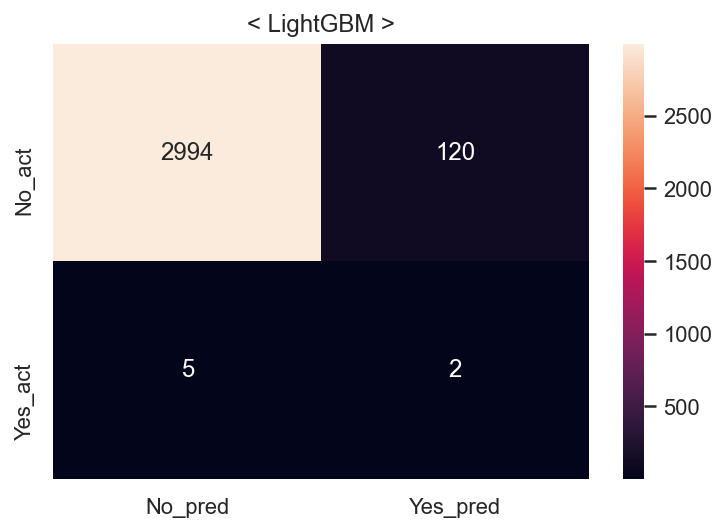

Fitting 5 folds for each of 1 candidates, totalling 5 fits
====Done Evaluation====
====Done Evaluation====


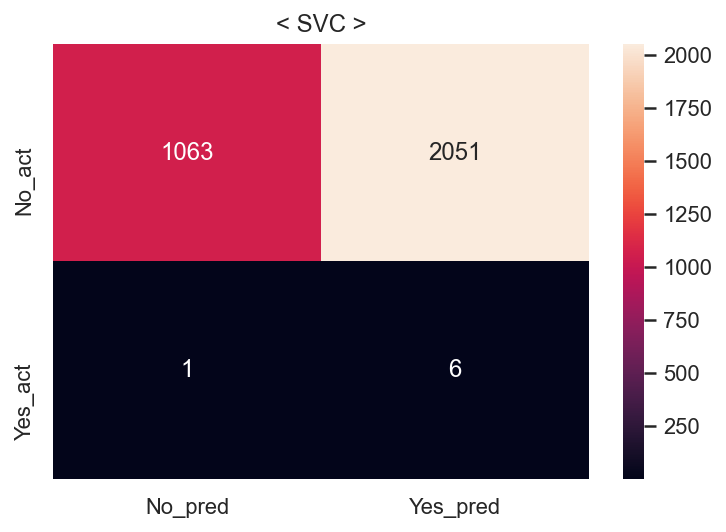

Fit time : 1.67 min


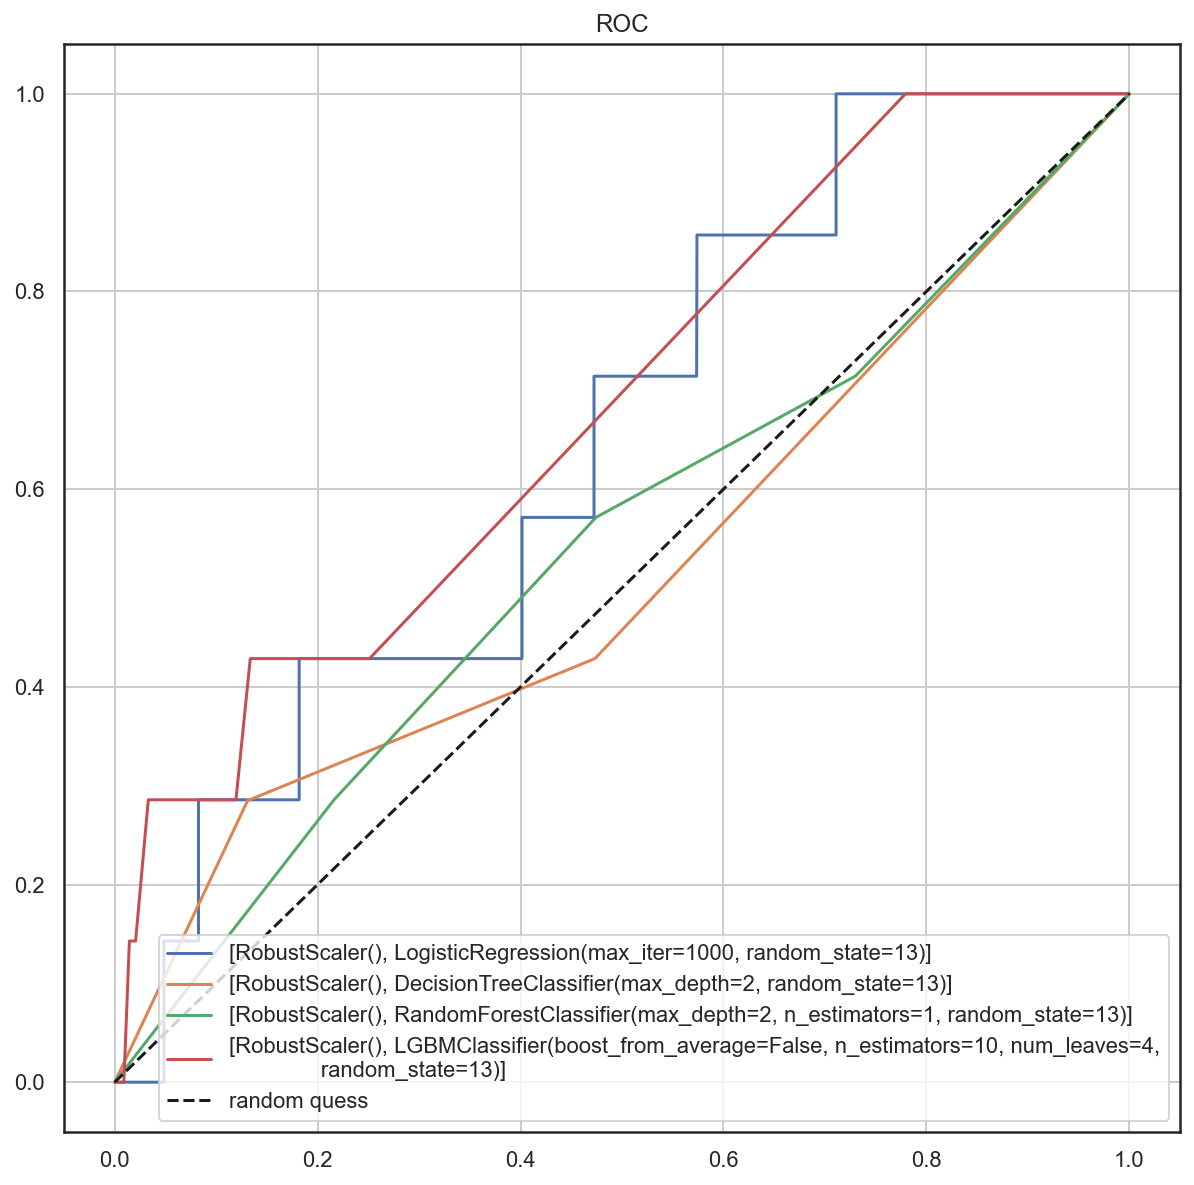

In [75]:
# # null_del
# socar_delete = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# delete안될 때, 인코딩 대상에서 제외해야 할 칼럼 ('repair_cost', 'insure_cost')
# police_site_aid_YN은 0,1밖에 없지만 일단 배정 칼럼값은 0,1,2라 굳이 제외하지 않았음
# 1hot
# cat_attribs = socar.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cnt', 'test_set',
#                                   'sharing_type', 'has_previous_accident', 'socarpass', 'socarsave', 'car_part1', 'car_part2',
#                                  'repair_cost', 'insure_cost'])
# socar_df = pd.get_dummies(socar, columns=cat_attribs)
# print(len(socar_df))


# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='BorderlineSMOTE')


_, result_df16 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='RB')

In [76]:
result_df16["null_del"] = [0] * len(result_df16)
result_df16["encoded"] = [0]  * len(result_df16)
result_df16["scaler"] = ["RB"]  * len(result_df16)
result_df16["sampler"] = ["BdlSMOTE"]  * len(result_df16)
result_df16 = result_df16[['null_del', 'encoded', 'scaler', 'sampler', 'classifier', 'train accuracy', 'train precision',
                             'train recall', 'train f1', 'train auc', 'test accuracy', 'test precision', 'test recall',
                             'test f1', 'test auc']]
result_df16

null_del  encoded scaler   sampler    classifier  train accuracy  \
0         0        0     RB  BdlSMOTE   LogisticReg        0.992502   
1         0        0     RB  BdlSMOTE  DecisionTree        0.955990   
2         0        0     RB  BdlSMOTE  RandomForest        0.942635   
3         0        0     RB  BdlSMOTE      LightGBM        0.987699   
4         0        0     RB  BdlSMOTE           SVC        0.665847   

   train precision  train recall  train f1  train auc  test accuracy  \
0         0.987703      0.997423  0.992539   0.992502       0.981416   
1         0.920672      0.997969  0.957763   0.955990       0.867350   
2         0.898474      0.998047  0.945647   0.942635       0.782762   
3         0.978030      0.997813  0.987822   0.987699       0.959949   
4         0.599466      0.999531  0.749451   0.665847       0.342518   

   test precision  test recall   test f1  test auc  
0        0.000000     0.000000  0.000000  0.491811  
1        0.004866     0.285714  0.009569  0.577186  
2        0.002963     0.285714  0.005865  0.534797  
3        0.016393     0.285714  0.031008  0.623589  
4        0.002917     0.857143  0.005814  0.599252

In [77]:
# 중간 결산
df_subtotal = pd.concat([result_df1, result_df2, result_df3, result_df4, 
                        result_df5, result_df6, result_df7, result_df8,
                        result_df9, result_df10, result_df11, result_df12,
                        result_df13, result_df14, result_df15, result_df16], axis=0).reset_index(drop=True)
print(df_subtotal.shape)
df_subtotal.tail(3)

(80, 15)


null_del  encoded scaler   sampler    classifier  train accuracy  \
77         0        0     RB  BdlSMOTE  RandomForest        0.942635   
78         0        0     RB  BdlSMOTE      LightGBM        0.987699   
79         0        0     RB  BdlSMOTE           SVC        0.665847   

    train precision  train recall  train f1  train auc  test accuracy  \
77         0.898474      0.998047  0.945647   0.942635       0.782762   
78         0.978030      0.997813  0.987822   0.987699       0.959949   
79         0.599466      0.999531  0.749451   0.665847       0.342518   

    test precision  test recall   test f1  test auc  
77        0.002963     0.285714  0.005865  0.534797  
78        0.016393     0.285714  0.031008  0.623589  
79        0.002917     0.857143  0.005814  0.599252

In [79]:
df_subtotal.to_csv("borderlineSMOTE_result.csv", encoding="utf-8-sig")

# ---------------- KmeansSMOTE ----------------

### (17) null_del = Y , encoded = Y , scaler = None

In [117]:
# null_del
socar_delete = socar.drop(['repair_cost', 'insure_cost', 'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt'], axis=1)
# 1hot
cat_attribs = socar_delete.columns.drop(['fraud_YN', 'accident_ratio', 'repair_cnt', 'test_set',
                                         'sharing_type', 'has_previous_accident', 'socarpass', 'socarsave', 'car_part1', 'car_part2'])
socar_df = pd.get_dummies(socar_delete, columns=cat_attribs)
# 데이터 분리
X_train, X_test, y_train, y_test = ut.split_train_test(socar_df)
# sampling
X_train_over, y_train_over = ut.fit_sampler(X_train, y_train, sampler='KMeansSMOTE')


_, result_df17 = ut.fit_cv(X_train_over, y_train_over, X_test, y_test, scaler='No')
# from imblearn.over_sampling import KMeansSMOTE

# sampler = KMeansSMOTE(random_state=13, )
# X_train_over, y_train_over = sampler.fit_resample(X_train, y_train)

==Split Result==
y_train :  [[0, 1], [12804, 34]]
y_test : [[0, 1], [3114, 7]]


RuntimeError: No clusters found with sufficient samples of class 1. Try lowering the cluster_balance_threshold or increasing the number of clusters.

In [110]:
np.array(y_train)

array([0, 0, 0, ..., 0, 0, 0])

In [113]:
tmp = np.array(y_train).reshape(len(y_train),-1)
tmp

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [116]:
X_train.shape

(12838, 51)

In [114]:
sampler = KMeansSMOTE(random_state=13, kmeans_estimator=280)
X_train_over, y_train_over = sampler.fit_resample(X_train, tmp)

ValueError: Found array with 0 sample(s) (shape=(0, 51)) while a minimum of 1 is required by check_pairwise_arrays.